In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn
from cliffs_delta import cliffs_delta

from pandas.api.types import CategoricalDtype
order = ['Internal', 'Narcissistic', 'External', 'Benevolent'] # Define the custom order
cat_type = CategoricalDtype(categories=order, ordered=True) # Set it as a CategoricalDtype

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'Times New Roman'

import pingouin as pg

df = pd.read_csv('./data/after.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df

,時間戳記,1. 您的实验编号？,2. 我能够感受到机器人的正面评价，如「你真厉害」、「做得很好」,3. 我能够感受到机器人把好的结果归因到了,4. 我能够感受到机器人的负面评价，如「做得不对」、「完成得不好」,5. 我能够感受到机器人把不好的结果归因到了,6. 我能够感受到机器人给我的评价,7. 我认同NAO对我的正面评价，我认为自己确实表现得不错,8. 我认为，在刚刚的实验任务中，动作完成得好主要是依赖于,9. 我认为，动作完成得好主要是______的功劳,...,75. 机器人只能做人类指示它去做的事情,76. 机器人永远不会做任何运行程序以外的事情,77. 我希望在本次实验中表现出色,78. 我相信我可以掌握本次实验中机器人教授的基本动作,79. 我相信我将在本次实验中取得优异的成绩,80. 我相信我可以掌握本次实验中机器人教授的动作,81. 我有信心在本次实验中表现出色,82. 我相信我能理解本次实验中机器人教授的困难动作,83. 我相信我能理解本次实验中机器人教授的复杂动作,84. 我相信我将在本次实验中出色地完成动作
0,2022-07-23 19:08:40.435,17,5,3,5,3,正面评价和负面评价相当,5,3,4,...,7,7,5,5,5,5,5,3,3,6
1,2022-07-24 10:42:36.312,25,7,2,7,6,正面评价更多,4,5,5,...,6,7,7,5,5,4,4,5,5,3
2,2022-07-24 11:30:04.161,49,6,3,6,2,正面评价和负面评价相当,4,4,3,...,5,3,6,5,3,4,3,4,3,3
3,2022-07-24 13:41:12.631,9,7,5,6,4,正面评价更多,4,5,4,...,7,7,7,4,4,4,2,1,1,1
4,2022-07-24 14:22:01.431,1,6,6,5,6,正面评价更多,4,4,3,...,4,3,6,5,6,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2022-07-31 10:44:46.640,56,7,1,7,1,正面评价和负面评价相当,5,2,2,...,7,7,4,7,7,7,7,7,7,6
60,2022-07-31 11:30:54.182,24,5,5,6,3,正面评价和负面评价相当,5,3,3,...,5,4,6,5,5,5,5,5,6,5
61,2022-07-31 12:42:42.503,32,7,2,5,7,正面评价更多,4,5,4,...,7,2,6,6,5,6,6,6,6,5
62,2022-08-01 10:20:24.240,14,5,3,5,4,正面评价更多,6,2,3,...,5,5,6,6,6,6,6,6,6,6


In [2]:
df.iloc[:, 33:36]

,33. 听到机器人的正面评价，我会认为自己受到了表扬,34. 我认为机器人有资格对我提出表扬,35. 我认可和接受机器人对我表扬
0,5,5,4
1,6,5,5
2,5,5,5
3,7,7,7
4,6,5,6
...,...,...,...
59,1,7,1
60,4,5,4
61,6,6,7
62,6,6,6


In [49]:
temp_df = pd.concat([df[df.columns[[33, 34, 35]]].iloc[0:8,], df[df.columns[[33, 34, 35]]].iloc[32:40,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(5.333333333333333,
 np.float64(4.916666666666667),
 np.float64(6.083333333333333))

In [50]:
temp_df = pd.concat([df[df.columns[[33, 34, 35]]].iloc[8:16,], df[df.columns[[33, 34, 35]]].iloc[40:48,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(5.5, np.float64(4.583333333333334), np.float64(6.0))

In [51]:
temp_df = pd.concat([df[df.columns[[33, 34, 35]]].iloc[16:24,], df[df.columns[[33, 34, 35]]].iloc[48:56,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(5.166666666666666, np.float64(4.666666666666667), np.float64(5.75))

In [52]:
temp_df = pd.concat([df[df.columns[[33, 34, 35]]].iloc[24:32,], df[df.columns[[33, 34, 35]]].iloc[56:64,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(5.333333333333333,
 np.float64(4.583333333333334),
 np.float64(6.083333333333333))

In [2]:
df.iloc[:, 36:39]

,36. 听到机器人的负面评价，我会认为自己受到了批评,37. 我认为机器人有资格对我提出批评,38. 我认可和接受机器人对我的批评
0,6,4,4
1,7,4,4
2,5,5,5
3,4,4,5
4,5,4,4
...,...,...,...
59,1,7,1
60,5,5,5
61,3,6,5
62,4,5,5


In [53]:
temp_df = pd.concat([df[df.columns[[36, 37, 38]]].iloc[0:8,], df[df.columns[[36, 37, 38]]].iloc[32:40,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(4.833333333333334,
 np.float64(3.9166666666666665),
 np.float64(5.083333333333333))

In [54]:
temp_df = pd.concat([df[df.columns[[36, 37, 38]]].iloc[8:16,], df[df.columns[[36, 37, 38]]].iloc[40:48,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(5.0, np.float64(3.3333333333333335), np.float64(5.416666666666666))

In [55]:
temp_df = pd.concat([df[df.columns[[36, 37, 38]]].iloc[16:24,], df[df.columns[[36, 37, 38]]].iloc[48:56,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(4.333333333333333, np.float64(4.25), np.float64(5.333333333333333))

In [56]:
temp_df = pd.concat([df[df.columns[[36, 37, 38]]].iloc[24:32,], df[df.columns[[36, 37, 38]]].iloc[56:64,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(4.666666666666667, np.float64(4.25), np.float64(5.416666666666666))

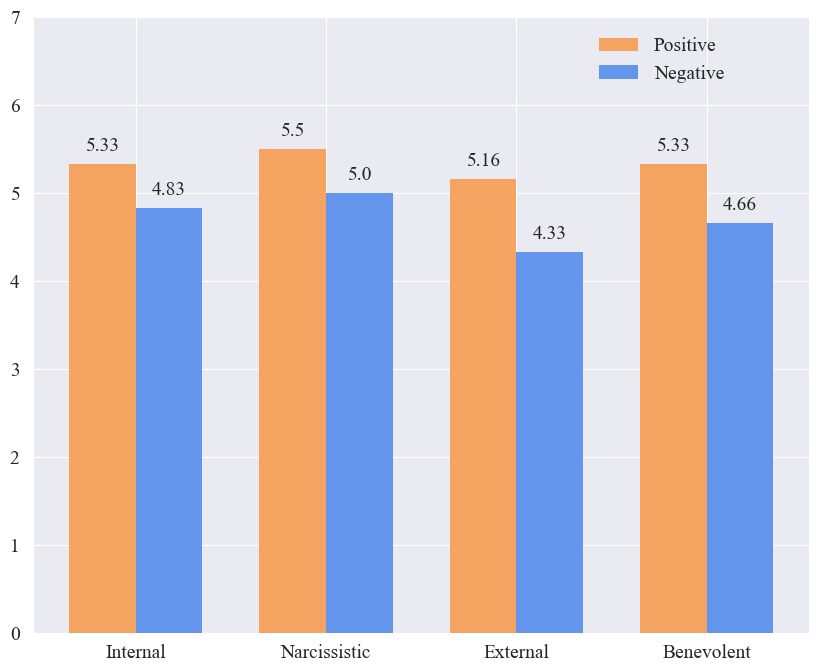

In [38]:
plt.rc('font', size=14)

# Example data: 4 groups × 2 values
group_names = ['Internal', 'Narcissistic', 'External', 'Benevolent']
valence_labels = ['Positive', 'Negative']

# Replace these with your actual values
positive_values = [5.33, 5.5, 5.16, 5.33]
negative_values = [4.83, 5, 4.33, 4.66]

# Prepare bar positions
x = np.arange(len(group_names))  # group positions
width = 0.35  # bar width

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot bars
bars1 = ax.bar(x - width/2, positive_values, width, label='Positive', color='sandybrown')
bars2 = ax.bar(x + width/2, negative_values, width, label='Negative', color='cornflowerblue')

# Axis labeling
ax.set_ylim(0, 7)
ax.set_xticks(x)
ax.tick_params(axis='x', pad=8)
ax.tick_params(axis='y', pad=10)
ax.set_xticklabels(group_names)
ax.legend()
plt.legend(loc=(0.72, 0.88))

# Optional: add value labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval}', ha='center', va='bottom')

plt.savefig(
    "./plot/fig_02.png",      # File name and extension
    dpi=300,            # Resolution (300+ for print quality)
    bbox_inches='tight',# Trims whitespace around the figure
    transparent=False   # Set to True if saving over transparent background (for PNG)
)

#Levels of feedback acceptance for positive/negative feedback across all attribution styles

In [24]:
#H2a: Participants demonstrate higher levels of acceptance toward attribution styles that are more considerate of the learner’s effort and avoid self-serving explanations when the feedback is positive.

i_df = pd.concat([df[df.columns[[33, 34, 35]]].iloc[0:8,], df[df.columns[[33, 34, 35]]].iloc[32:40,]])
n_df = pd.concat([df[df.columns[[33, 34, 35]]].iloc[8:16,], df[df.columns[[33, 34, 35]]].iloc[40:48,]])
e_df = pd.concat([df[df.columns[[33, 34, 35]]].iloc[16:24,], df[df.columns[[33, 34, 35]]].iloc[48:56,]])
b_df = pd.concat([df[df.columns[[33, 34, 35]]].iloc[24:32,], df[df.columns[[33, 34, 35]]].iloc[56:64,]])

temp_data, tracker = [], 0

for i in range(len(i_df)):
    tracker = (i_df.iloc[i, 0] + i_df.iloc[i, 1] + i_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

i_data = temp_data
temp_data, tracker = [], 0

for i in range(len(n_df)):
    tracker = (n_df.iloc[i, 0] + n_df.iloc[i, 1] + n_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

n_data = temp_data
temp_data, tracker = [], 0

for i in range(len(e_df)):
    tracker = (e_df.iloc[i, 0] + e_df.iloc[i, 1] + e_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

e_data = temp_data
temp_data, tracker = [], 0

for i in range(len(b_df)):
    tracker = (b_df.iloc[i, 0] + b_df.iloc[i, 1] + b_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

b_data = temp_data

# Kruskal-Wallis H Test
stat, p = kruskal(i_data, n_data, e_data, b_data)

# Effect Size
k, N = 4, 64  # number of groups, number of all entries
eta_squared = (stat - k + 1) / (N - k)

print(f"Kruskal-Wallis H Test Statistic: {stat}")
print(f"P-value: {p}")
print(f"Effect Size (η²): {eta_squared}")

Kruskal-Wallis H Test Statistic: 0.1531194135537543
P-value: 0.9847769389409932
Effect Size (η²): -0.0474480097741041


In [27]:
i_data = pd.DataFrame(i_data, columns=['Values'])
print(i_data.median(), i_data.quantile(0.75) - i_data.quantile(0.25))

n_data = pd.DataFrame(n_data, columns=['Values'])
print(n_data.median(), n_data.quantile(0.75) - n_data.quantile(0.25))

e_data = pd.DataFrame(e_data, columns=['Values'])
print(e_data.median(), e_data.quantile(0.75) - e_data.quantile(0.25))

b_data = pd.DataFrame(b_data, columns=['Values'])
print(b_data.median(), b_data.quantile(0.75) - b_data.quantile(0.25))

Values    5.333333
dtype: float64 Values    1.166667
dtype: float64
Values    5.5
dtype: float64 Values    1.416667
dtype: float64
Values    5.166667
dtype: float64 Values    1.083333
dtype: float64
Values    5.333333
dtype: float64 Values    1.5
dtype: float64


In [78]:
dunn_data = {
    'Data': i_data + n_data + e_data + b_data,
    'Group': ['Internal'] * 16 + ['Narcissistic'] * 16 + ['External'] * 16 + ['Benevolent'] * 16
}

dunn_df = pd.DataFrame(dunn_data)
dunn_df['Group'] = dunn_df['Group'].astype(cat_type)

# Perform Dunn's Test
posthoc = posthoc_dunn(dunn_df, val_col='Data', group_col='Group', p_adjust=None)
print(posthoc)

              Internal  Narcissistic  External  Benevolent
Internal      1.000000      0.912447  0.705681    0.840868
Narcissistic  0.912447      1.000000  0.788922    0.927627
External      0.705681      0.788922  1.000000    0.859602
Benevolent    0.840868      0.927627  0.859602    1.000000


In [28]:
#H2b: Participants demonstrate higher levels of acceptance toward attribution styles that are more considerate of the learner’s effort and avoid self-serving explanations when the feedback is negative.

i_df = pd.concat([df[df.columns[[36, 37, 38]]].iloc[0:8,], df[df.columns[[36, 37, 38]]].iloc[32:40,]])
n_df = pd.concat([df[df.columns[[36, 37, 38]]].iloc[8:16,], df[df.columns[[36, 37, 38]]].iloc[40:48,]])
e_df = pd.concat([df[df.columns[[36, 37, 38]]].iloc[16:24,], df[df.columns[[36, 37, 38]]].iloc[48:56,]])
b_df = pd.concat([df[df.columns[[36, 37, 38]]].iloc[24:32,], df[df.columns[[36, 37, 38]]].iloc[56:64,]])

temp_data, tracker = [], 0

for i in range(len(i_df)):
    tracker = (i_df.iloc[i, 0] + i_df.iloc[i, 1] + i_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

i_data = temp_data
temp_data, tracker = [], 0

for i in range(len(n_df)):
    tracker = (n_df.iloc[i, 0] + n_df.iloc[i, 1] + n_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

n_data = temp_data
temp_data, tracker = [], 0

for i in range(len(e_df)):
    tracker = (e_df.iloc[i, 0] + e_df.iloc[i, 1] + e_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

e_data = temp_data
temp_data, tracker = [], 0

for i in range(len(b_df)):
    tracker = (b_df.iloc[i, 0] + b_df.iloc[i, 1] + b_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

b_data = temp_data

# Kruskal-Wallis H Test
stat, p = kruskal(i_data, n_data, e_data, b_data)

# Effect Size
k, N = 4, 64  # number of groups, number of all entries
eta_squared = (stat - k + 1) / (N - k)

print(f"Kruskal-Wallis H Test Statistic: {stat}")
print(f"P-value: {p}")
print(f"Effect Size (η²): {eta_squared}")

Kruskal-Wallis H Test Statistic: 0.26542993224114503
P-value: 0.9663934064352583
Effect Size (η²): -0.04557616779598092


In [29]:
i_data = pd.DataFrame(i_data, columns=['Values'])
print(i_data.median(), i_data.quantile(0.75) - i_data.quantile(0.25))

n_data = pd.DataFrame(n_data, columns=['Values'])
print(n_data.median(), n_data.quantile(0.75) - n_data.quantile(0.25))

e_data = pd.DataFrame(e_data, columns=['Values'])
print(e_data.median(), e_data.quantile(0.75) - e_data.quantile(0.25))

b_data = pd.DataFrame(b_data, columns=['Values'])
print(b_data.median(), b_data.quantile(0.75) - b_data.quantile(0.25))

Values    4.833333
dtype: float64 Values    1.166667
dtype: float64
Values    5.0
dtype: float64 Values    2.083333
dtype: float64
Values    4.333333
dtype: float64 Values    1.083333
dtype: float64
Values    4.666667
dtype: float64 Values    1.166667
dtype: float64


In [76]:
dunn_data = {
    'Data': i_data + n_data + e_data + b_data,
    'Group': ['Internal'] * 16 + ['Narcissistic'] * 16 + ['External'] * 16 + ['Benevolent'] * 16
}

dunn_df = pd.DataFrame(dunn_data)
dunn_df['Group'] = dunn_df['Group'].astype(cat_type)

# Perform Dunn's Test
posthoc = posthoc_dunn(dunn_df, val_col='Data', group_col='Group', p_adjust=None)
print(posthoc)

              Internal  Narcissistic  External  Benevolent
Internal      1.000000      0.859636  0.939045    0.691597
Narcissistic  0.859636      1.000000  0.800031    0.825987
External      0.939045      0.800031  1.000000    0.636100
Benevolent    0.691597      0.825987  0.636100    1.000000


In [6]:
# H1: Participants have higher acceptance for positive feedback than negative feedback.

positive = pd.concat([df[df.columns[[33, 34, 35]]].iloc[0:8,], df[df.columns[[33, 34, 35]]].iloc[32:40,]]).sum(axis=1)
negative = pd.concat([df[df.columns[[36, 37, 38]]].iloc[0:8,], df[df.columns[[36, 37, 38]]].iloc[32:40,]]).sum(axis=1)

stat, p = wilcoxon(positive, negative, alternative='greater')

positive, negative = positive / 3, negative / 3
print(positive.median(), positive.quantile(0.75) - positive.quantile(0.25), negative.median(), negative.quantile(0.75) - negative.quantile(0.25))

print(f"Wilcoxon Signed-Rank Test:")
print(f"Statistic = {stat}")
print(f"p-value = {p:.4f}")

5.333333333333333 1.166666666666666 4.833333333333334 1.1666666666666665
Wilcoxon Signed-Rank Test:
Statistic = 64.0
p-value = 0.0026


In [94]:
n = 16
z = (stat - (n * (n + 1)) / 4) / np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
r = abs(z) / np.sqrt(n)

print(f"Estimated effect size (r) ≈ {r:.3f}")

Estimated effect size (r) ≈ 0.052


In [7]:
positive = pd.concat([df[df.columns[[33, 34, 35]]].iloc[8:16,], df[df.columns[[33, 34, 35]]].iloc[40:48,]]).sum(axis=1)
negative = pd.concat([df[df.columns[[36, 37, 38]]].iloc[8:16,], df[df.columns[[36, 37, 38]]].iloc[40:48,]]).sum(axis=1)

stat, p = wilcoxon(positive, negative)

positive, negative = positive / 3, negative / 3
print(positive.median(), positive.quantile(0.75) - positive.quantile(0.25), negative.median(), negative.quantile(0.75) - negative.quantile(0.25))

print(f"Wilcoxon Signed-Rank Test:")
print(f"Statistic = {stat}")
print(f"p-value = {p:.4f}")

5.5 1.416666666666666 5.0 2.0833333333333326
Wilcoxon Signed-Rank Test:
Statistic = 13.0
p-value = 0.0126


In [96]:
n = 16
z = (stat - (n * (n + 1)) / 4) / np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
r = abs(z) / np.sqrt(n)

print(f"Estimated effect size (r) ≈ {r:.3f}")

Estimated effect size (r) ≈ 0.711


In [8]:
positive = pd.concat([df[df.columns[[33, 34, 35]]].iloc[16:24,], df[df.columns[[33, 34, 35]]].iloc[48:56,]]).sum(axis=1)
negative = pd.concat([df[df.columns[[36, 37, 38]]].iloc[16:24,], df[df.columns[[36, 37, 38]]].iloc[48:56,]]).sum(axis=1)

stat, p = wilcoxon(positive, negative)

positive, negative = positive / 3, negative / 3
print(positive.median(), positive.quantile(0.75) - positive.quantile(0.25), negative.median(), negative.quantile(0.75) - negative.quantile(0.25))

print(f"Wilcoxon Signed-Rank Test:")
print(f"Statistic = {stat}")
print(f"p-value = {p:.4f}")

5.166666666666666 1.083333333333333 4.333333333333333 1.083333333333333
Wilcoxon Signed-Rank Test:
Statistic = 12.0
p-value = 0.0108


In [36]:
n = 16
z = (stat - (n * (n + 1)) / 4) / np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
r = abs(z) / np.sqrt(n)

print(f"Estimated effect size (r) ≈ {r:.3f}")

Estimated effect size (r) ≈ 0.724


In [9]:
positive = pd.concat([df[df.columns[[33, 34, 35]]].iloc[24:32,], df[df.columns[[33, 34, 35]]].iloc[56:64,]]).sum(axis=1)
negative = pd.concat([df[df.columns[[36, 37, 38]]].iloc[24:32,], df[df.columns[[36, 37, 38]]].iloc[56:64,]]).sum(axis=1)

stat, p = wilcoxon(positive, negative, alternative='greater')

positive, negative = positive / 3, negative / 3
print(positive.median(), positive.quantile(0.75) - positive.quantile(0.25), negative.median(), negative.quantile(0.75) - negative.quantile(0.25))

print(f"Wilcoxon Signed-Rank Test:")
print(f"Statistic = {stat}")
print(f"p-value = {p:.4f}")

5.333333333333333 1.4999999999999991 4.666666666666667 1.166666666666666
Wilcoxon Signed-Rank Test:
Statistic = 69.0
p-value = 0.0497


In [98]:
n = 16
z = (stat - (n * (n + 1)) / 4) / np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
r = abs(z) / np.sqrt(n)

print(f"Estimated effect size (r) ≈ {r:.3f}")

Estimated effect size (r) ≈ 0.013


In [107]:
df.iloc[:, 39:44]

,39. 机器人的正面评价让我感到,40. 机器人的正面反馈让我感到,41. 机器人的正面反馈能够______我学习的热情,42. 机器人的正面反馈______了我的自信,43. 机器人的正面反馈______了我的学习动力
0,6,6,5,5,5
1,7,6,7,6,6
2,6,6,5,5,5
3,5,5,6,7,7
4,5,3,6,6,6
...,...,...,...,...,...
59,4,7,4,4,4
60,4,5,5,5,5
61,6,7,4,4,5
62,5,5,6,6,6


In [121]:
temp_df = pd.concat([df[df.columns[[39, 40, 41, 42, 43]]].iloc[0:8,], df[df.columns[[39, 40, 41, 42, 43]]].iloc[32:40,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2] + temp_df.iloc[i, 3] + temp_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(5.7, np.float64(5.0), np.float64(6.0))

In [122]:
temp_df = pd.concat([df[df.columns[[39, 40, 41, 42, 43]]].iloc[8:16,], df[df.columns[[39, 40, 41, 42, 43]]].iloc[40:48,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2] + temp_df.iloc[i, 3] + temp_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(5.2, np.float64(4.75), np.float64(6.4))

In [123]:
temp_df = pd.concat([df[df.columns[[39, 40, 41, 42, 43]]].iloc[16:24,], df[df.columns[[39, 40, 41, 42, 43]]].iloc[48:56,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2] + temp_df.iloc[i, 3] + temp_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(5.9, np.float64(4.95), np.float64(6.3))

In [124]:
temp_df = pd.concat([df[df.columns[[39, 40, 41, 42, 43]]].iloc[24:32,], df[df.columns[[39, 40, 41, 42, 43]]].iloc[56:64,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2] + temp_df.iloc[i, 3] + temp_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(5.4, np.float64(4.95), np.float64(6.0))

In [109]:
df.iloc[:, 45:50]

,45. 机器人的负面评价让我感到,46. 机器人的负面反馈让我感到,47. 机器人的负面反馈能够______我学习的热情,48. 机器人的负面反馈______了我的自信,49. 机器人的负面反馈______了我的学习动力
0,3,2,2,2,2
1,1,1,2,1,1
2,3,3,3,3,3
3,4,4,4,4,4
4,3,3,3,4,3
...,...,...,...,...,...
59,1,3,5,6,6
60,2,2,2,3,2
61,3,4,5,5,6
62,3,3,4,4,5


In [125]:
temp_df = pd.concat([df[df.columns[[45, 46, 47, 48, 49]]].iloc[0:8,], df[df.columns[[45, 46, 47, 48, 49]]].iloc[32:40,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2] + temp_df.iloc[i, 3] + temp_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(3.6, np.float64(3.1500000000000004), np.float64(4.0))

In [126]:
temp_df = pd.concat([df[df.columns[[45, 46, 47, 48, 49]]].iloc[8:16,], df[df.columns[[45, 46, 47, 48, 49]]].iloc[40:48,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2] + temp_df.iloc[i, 3] + temp_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(3.7, np.float64(3.0), np.float64(4.05))

In [127]:
temp_df = pd.concat([df[df.columns[[45, 46, 47, 48, 49]]].iloc[16:24,], df[df.columns[[45, 46, 47, 48, 49]]].iloc[48:56,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2] + temp_df.iloc[i, 3] + temp_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(3.1, np.float64(2.4), np.float64(3.8499999999999996))

In [128]:
temp_df = pd.concat([df[df.columns[[45, 46, 47, 48, 49]]].iloc[24:32,], df[df.columns[[45, 46, 47, 48, 49]]].iloc[56:64,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2] + temp_df.iloc[i, 3] + temp_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(3.5, np.float64(3.0), np.float64(4.0))

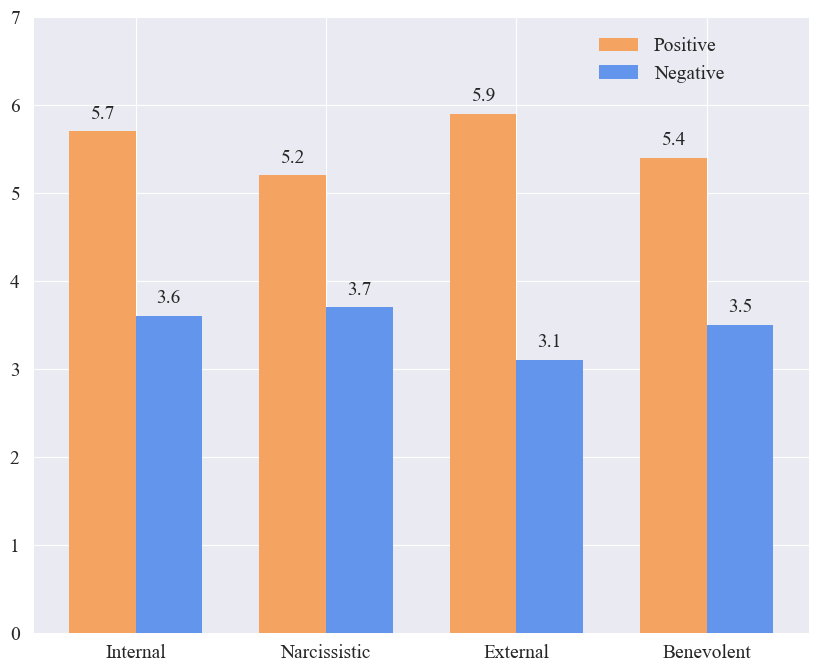

In [37]:
plt.rc('font', size=14)

# Example data: 4 groups × 2 values
group_names = ['Internal', 'Narcissistic', 'External', 'Benevolent']
valence_labels = ['Positive', 'Negative']

# Replace these with your actual values
positive_values = [5.7, 5.2, 5.9, 5.4]
negative_values = [3.6, 3.7, 3.1, 3.5]

# Prepare bar positions
x = np.arange(len(group_names))  # group positions
width = 0.35  # bar width

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot bars
bars1 = ax.bar(x - width/2, positive_values, width, label='Positive', color='sandybrown')
bars2 = ax.bar(x + width/2, negative_values, width, label='Negative', color='cornflowerblue')

# Axis labeling
ax.set_ylim(0, 7)
ax.set_xticks(x)
ax.tick_params(axis='x', pad=8)
ax.tick_params(axis='y', pad=10)
ax.set_xticklabels(group_names)
ax.legend()
plt.legend(loc=(0.72, 0.88))

# Optional: add value labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval}', ha='center', va='bottom')

plt.savefig(
    "./plot/fig_03.png",      # File name and extension
    dpi=300,            # Resolution (300+ for print quality)
    bbox_inches='tight',# Trims whitespace around the figure
    transparent=False   # Set to True if saving over transparent background (for PNG)
)

#Levels of feedback influence for positive/negative feedback across all attribution styles

In [51]:
#H4a: Positive feedback from a robot tutor influences learners more effectively when the attribution style is more considerate of the learner’s effort and avoids self-serving explanations.

i_df = pd.concat([df[df.columns[[39, 40, 41, 42, 43]]].iloc[0:8,], df[df.columns[[39, 40, 41, 42, 43]]].iloc[32:40,]])
n_df = pd.concat([df[df.columns[[39, 40, 41, 42, 43]]].iloc[8:16,], df[df.columns[[39, 40, 41, 42, 43]]].iloc[40:48,]])
e_df = pd.concat([df[df.columns[[39, 40, 41, 42, 43]]].iloc[16:24,], df[df.columns[[39, 40, 41, 42, 43]]].iloc[48:56,]])
b_df = pd.concat([df[df.columns[[39, 40, 41, 42, 43]]].iloc[24:32,], df[df.columns[[39, 40, 41, 42, 43]]].iloc[56:64,]])

temp_data, tracker = [], 0

for i in range(len(i_df)):
    tracker = (i_df.iloc[i, 0] + i_df.iloc[i, 1] + i_df.iloc[i, 2] + i_df.iloc[i, 3] + i_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

i_data = temp_data
temp_data, tracker = [], 0

for i in range(len(n_df)):
    tracker = (n_df.iloc[i, 0] + n_df.iloc[i, 1] + n_df.iloc[i, 2] + n_df.iloc[i, 3] + n_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

n_data = temp_data
temp_data, tracker = [], 0

for i in range(len(e_df)):
    tracker = (e_df.iloc[i, 0] + e_df.iloc[i, 1] + e_df.iloc[i, 2] + e_df.iloc[i, 3] + e_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

e_data = temp_data
temp_data, tracker = [], 0

for i in range(len(b_df)):
    tracker = (b_df.iloc[i, 0] + b_df.iloc[i, 1] + b_df.iloc[i, 2] + b_df.iloc[i, 3] + b_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

b_data = temp_data

# Kruskal-Wallis H Test
stat, p = kruskal(i_data, n_data, e_data, b_data)

# Effect Size
k, N = 4, 64  # number of groups, number of all entries
eta_squared = (stat - k + 1) / (N - k)

print(f"Kruskal-Wallis H Test Statistic: {stat}")
print(f"P-value: {p}")
print(f"Effect Size (η²): {eta_squared}")

Kruskal-Wallis H Test Statistic: 1.9457279582366593
P-value: 0.583747126598569
Effect Size (η²): -0.017571200696055674


In [52]:
i_data = pd.DataFrame(i_data, columns=['Values'])
print(i_data.median(), i_data.quantile(0.75) - i_data.quantile(0.25))

n_data = pd.DataFrame(n_data, columns=['Values'])
print(n_data.median(), n_data.quantile(0.75) - n_data.quantile(0.25))

e_data = pd.DataFrame(e_data, columns=['Values'])
print(e_data.median(), e_data.quantile(0.75) - e_data.quantile(0.25))

b_data = pd.DataFrame(b_data, columns=['Values'])
print(b_data.median(), b_data.quantile(0.75) - b_data.quantile(0.25))

Values    5.7
dtype: float64 Values    1.0
dtype: float64
Values    5.2
dtype: float64 Values    1.65
dtype: float64
Values    5.9
dtype: float64 Values    1.35
dtype: float64
Values    5.4
dtype: float64 Values    1.05
dtype: float64


In [72]:
dunn_data = {
    'Data': i_data + n_data + e_data + b_data,
    'Group': ['Internal'] * 16 + ['Narcissistic'] * 16 + ['External'] * 16 + ['Benevolent'] * 16
}

dunn_df = pd.DataFrame(dunn_data)
dunn_df['Group'] = dunn_df['Group'].astype(cat_type)

# Perform Dunn's Test
posthoc = posthoc_dunn(dunn_df, val_col='Data', group_col='Group', p_adjust=None)
print(posthoc)

              Internal  Narcissistic  External  Benevolent
Internal      1.000000      0.639536  0.619174    0.416540
Narcissistic  0.639536      1.000000  0.334360    0.730777
External      0.619174      0.334360  1.000000    0.190379
Benevolent    0.416540      0.730777  0.190379    1.000000


In [53]:
#H4b: Negative feedback from a robot tutor influences learners more effectively when the attribution style is more considerate of the learner’s effort and avoids self-serving explanations.

i_df = pd.concat([df[df.columns[[45, 46, 47, 48, 49]]].iloc[0:8,], df[df.columns[[45, 46, 47, 48, 49]]].iloc[32:40,]])
n_df = pd.concat([df[df.columns[[45, 46, 47, 48, 49]]].iloc[8:16,], df[df.columns[[45, 46, 47, 48, 49]]].iloc[40:48,]])
e_df = pd.concat([df[df.columns[[45, 46, 47, 48, 49]]].iloc[16:24,], df[df.columns[[45, 46, 47, 48, 49]]].iloc[48:56,]])
b_df = pd.concat([df[df.columns[[45, 46, 47, 48, 49]]].iloc[24:32,], df[df.columns[[45, 46, 47, 48, 49]]].iloc[56:64,]])

temp_data, tracker = [], 0

for i in range(len(i_df)):
    tracker = (i_df.iloc[i, 0] + i_df.iloc[i, 1] + i_df.iloc[i, 2] + i_df.iloc[i, 3] + i_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

i_data = temp_data
temp_data, tracker = [], 0

for i in range(len(n_df)):
    tracker = (n_df.iloc[i, 0] + n_df.iloc[i, 1] + n_df.iloc[i, 2] + n_df.iloc[i, 3] + n_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

n_data = temp_data
temp_data, tracker = [], 0

for i in range(len(e_df)):
    tracker = (e_df.iloc[i, 0] + e_df.iloc[i, 1] + e_df.iloc[i, 2] + e_df.iloc[i, 3] + e_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

e_data = temp_data
temp_data, tracker = [], 0

for i in range(len(b_df)):
    tracker = (b_df.iloc[i, 0] + b_df.iloc[i, 1] + b_df.iloc[i, 2] + b_df.iloc[i, 3] + b_df.iloc[i, 4]) / 5
    temp_data.append(tracker)

b_data = temp_data

# Kruskal-Wallis H Test
stat, p = kruskal(i_data, n_data, e_data, b_data)

# Effect Size
k, N = 4, 64  # number of groups, number of all entries
eta_squared = (stat - k + 1) / (N - k)

print(f"Kruskal-Wallis H Test Statistic: {stat}")
print(f"P-value: {p}")
print(f"Effect Size (η²): {eta_squared}")

Kruskal-Wallis H Test Statistic: 1.0341874046859942
P-value: 0.7929803979677674
Effect Size (η²): -0.03276354325523343


In [54]:
i_data = pd.DataFrame(i_data, columns=['Values'])
print(i_data.median(), i_data.quantile(0.75) - i_data.quantile(0.25))

n_data = pd.DataFrame(n_data, columns=['Values'])
print(n_data.median(), n_data.quantile(0.75) - n_data.quantile(0.25))

e_data = pd.DataFrame(e_data, columns=['Values'])
print(e_data.median(), e_data.quantile(0.75) - e_data.quantile(0.25))

b_data = pd.DataFrame(b_data, columns=['Values'])
print(b_data.median(), b_data.quantile(0.75) - b_data.quantile(0.25))

Values    3.6
dtype: float64 Values    0.85
dtype: float64
Values    3.7
dtype: float64 Values    1.05
dtype: float64
Values    3.1
dtype: float64 Values    1.45
dtype: float64
Values    3.5
dtype: float64 Values    1.0
dtype: float64


In [74]:
dunn_data = {
    'Data': i_data + n_data + e_data + b_data,
    'Group': ['Internal'] * 16 + ['Narcissistic'] * 16 + ['External'] * 16 + ['Benevolent'] * 16
}

dunn_df = pd.DataFrame(dunn_data)
dunn_df['Group'] = dunn_df['Group'].astype(cat_type)

# Perform Dunn's Test
posthoc = posthoc_dunn(dunn_df, val_col='Data', group_col='Group', p_adjust=None)
print(posthoc)

              Internal  Narcissistic  External  Benevolent
Internal      1.000000      0.830068  0.451128    0.852445
Narcissistic  0.830068      1.000000  0.332969    0.688704
External      0.451128      0.332969  1.000000    0.570350
Benevolent    0.852445      0.688704  0.570350    1.000000


In [40]:
# H3: Positive feedback from a robot tutor has a greater influence on learners than negative feedback.

positive = pd.concat([df[df.columns[[39, 40, 41, 42, 43]]].iloc[0:8,], df[df.columns[[39, 40, 41, 42, 43]]].iloc[32:40,]]).sum(axis=1)
negative = pd.concat([df[df.columns[[45, 46, 47, 48, 49]]].iloc[0:8,], df[df.columns[[45, 46, 47, 48, 49]]].iloc[32:40,]]).sum(axis=1)

stat, p = wilcoxon(positive, negative, alternative='greater')

positive, negative = positive / 5, negative / 5
print(positive.median(), positive.quantile(0.75) - positive.quantile(0.25), negative.median(), negative.quantile(0.75) - negative.quantile(0.25))

print(f"Wilcoxon Signed-Rank Test:")
print(f"Statistic = {stat}")
print(f"p-value = {p:.4f}")

5.7 1.0 3.6 0.8499999999999996
Wilcoxon Signed-Rank Test:
Statistic = 136.0
p-value = 0.0002


In [41]:
n = 16
z = (stat - (n * (n + 1)) / 4) / np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
r = abs(z) / np.sqrt(n)

print(f"Estimated effect size (r) ≈ {r:.3f}")

Estimated effect size (r) ≈ 0.879


In [38]:
positive = pd.concat([df[df.columns[[39, 40, 41, 42, 43]]].iloc[8:16,], df[df.columns[[39, 40, 41, 42, 43]]].iloc[40:48,]]).sum(axis=1)
negative = pd.concat([df[df.columns[[45, 46, 47, 48, 49]]].iloc[8:16,], df[df.columns[[45, 46, 47, 48, 49]]].iloc[40:48,]]).sum(axis=1)

stat, p = wilcoxon(positive, negative)

positive, negative = positive / 5, negative / 5
print(positive.median(), positive.quantile(0.75) - positive.quantile(0.25), negative.median(), negative.quantile(0.75) - negative.quantile(0.25))

print(f"Wilcoxon Signed-Rank Test:")
print(f"Statistic = {stat}")
print(f"p-value = {p:.4f}")

5.2 1.6500000000000004 3.7 1.0499999999999998
Wilcoxon Signed-Rank Test:
Statistic = 0.0
p-value = 0.0004


In [39]:
n = 16
z = (stat - (n * (n + 1)) / 4) / np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
r = abs(z) / np.sqrt(n)

print(f"Estimated effect size (r) ≈ {r:.3f}")

Estimated effect size (r) ≈ 0.879


In [42]:
positive = pd.concat([df[df.columns[[39, 40, 41, 42, 43]]].iloc[16:24,], df[df.columns[[39, 40, 41, 42, 43]]].iloc[48:56,]]).sum(axis=1)
negative = pd.concat([df[df.columns[[45, 46, 47, 48, 49]]].iloc[16:24,], df[df.columns[[45, 46, 47, 48, 49]]].iloc[48:56,]]).sum(axis=1)

stat, p = wilcoxon(positive, negative)

positive, negative = positive / 5, negative / 5
print(positive.median(), positive.quantile(0.75) - positive.quantile(0.25), negative.median(), negative.quantile(0.75) - negative.quantile(0.25))

print(f"Wilcoxon Signed-Rank Test:")
print(f"Statistic = {stat}")
print(f"p-value = {p:.4f}")

5.9 1.3499999999999996 3.1 1.4499999999999997
Wilcoxon Signed-Rank Test:
Statistic = 0.0
p-value = 0.0004


In [47]:
n = 16
z = (stat - (n * (n + 1)) / 4) / np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
r = abs(z) / np.sqrt(n)

print(f"Estimated effect size (r) ≈ {r:.3f}")

Estimated effect size (r) ≈ 0.879


In [45]:
positive = pd.concat([df[df.columns[[39, 40, 41, 42, 43]]].iloc[24:32,], df[df.columns[[39, 40, 41, 42, 43]]].iloc[56:64,]]).sum(axis=1)
negative = pd.concat([df[df.columns[[45, 46, 47, 48, 49]]].iloc[24:32,], df[df.columns[[45, 46, 47, 48, 49]]].iloc[56:64,]]).sum(axis=1)

stat, p = wilcoxon(positive, negative)

positive, negative = positive / 5, negative / 5
print(positive.median(), positive.quantile(0.75) - positive.quantile(0.25), negative.median(), negative.quantile(0.75) - negative.quantile(0.25))

print(f"Wilcoxon Signed-Rank Test:")
print(f"Statistic = {stat}")
print(f"p-value = {p:.4f}")

5.4 1.0499999999999998 3.5 1.0
Wilcoxon Signed-Rank Test:
Statistic = 0.0
p-value = 0.0007


In [46]:
n = 16
z = (stat - (n * (n + 1)) / 4) / np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
r = abs(z) / np.sqrt(n)

print(f"Estimated effect size (r) ≈ {r:.3f}")

Estimated effect size (r) ≈ 0.879


In [132]:
df[df.columns[[51, 52, 53, 55]]]

,51. 我喜欢这个机器人,52. 如果不能再次使用这个机器人，我会有种失落感,53. 我认为这个机器人适合我的风格,55. 我认为与这个机器人的互动是令人愉快的
0,4,4,1,3
1,6,6,5,7
2,4,3,3,4
3,5,1,4,4
4,6,3,4,6
...,...,...,...,...
59,3,3,2,1
60,6,5,4,5
61,7,6,6,7
62,5,4,4,6


In [133]:
temp_df = pd.concat([df[df.columns[[51, 52, 53, 55]]].iloc[0:8,], df[df.columns[[51, 52, 53, 55]]].iloc[32:40,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2] + temp_df.iloc[i, 3]) / 4
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(4.75, np.float64(4.0625), np.float64(5.5))

In [134]:
temp_df = pd.concat([df[df.columns[[51, 52, 53, 55]]].iloc[8:16,], df[df.columns[[51, 52, 53, 55]]].iloc[40:48,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2] + temp_df.iloc[i, 3]) / 4
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(4.875, np.float64(3.75), np.float64(5.5))

In [135]:
temp_df = pd.concat([df[df.columns[[51, 52, 53, 55]]].iloc[16:24,], df[df.columns[[51, 52, 53, 55]]].iloc[48:56,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2] + temp_df.iloc[i, 3]) / 4
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(4.875, np.float64(4.25), np.float64(5.4375))

In [137]:
temp_df = pd.concat([df[df.columns[[51, 52, 53, 55]]].iloc[24:32,], df[df.columns[[51, 52, 53, 55]]].iloc[56:64,]])
temp_data, tracker = [], 0

for i in range(len(temp_df)):
    tracker = (temp_df.iloc[i, 0] + temp_df.iloc[i, 1] + temp_df.iloc[i, 2] + temp_df.iloc[i, 3]) / 4
    temp_data.append(tracker)

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

(4.75, np.float64(4.0), np.float64(5.375))

In [ ]:
temp_df = pd.concat([df[df.columns[[64]]].iloc[0:8,], df[df.columns[[64]]].iloc[32:40,]])

pd.Series(temp_data).median(), pd.Series(temp_data).quantile(0.25), pd.Series(temp_data).quantile(0.75)

In [153]:
temp_df = pd.concat([df[df.columns[[64]]].iloc[0:8,], df[df.columns[[64]]].iloc[32:40,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

64. 我认为机器人是我的______    5.0
dtype: float64 64. 我认为机器人是我的______    2.75
Name: 0.25, dtype: float64 64. 我认为机器人是我的______    5.0
Name: 0.75, dtype: float64


In [155]:
temp_df = pd.concat([df[df.columns[[64]]].iloc[8:16,], df[df.columns[[64]]].iloc[40:48,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

64. 我认为机器人是我的______    4.5
dtype: float64 64. 我认为机器人是我的______    2.0
Name: 0.25, dtype: float64 64. 我认为机器人是我的______    6.0
Name: 0.75, dtype: float64


In [156]:
temp_df = pd.concat([df[df.columns[[64]]].iloc[16:24,], df[df.columns[[64]]].iloc[48:56,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

64. 我认为机器人是我的______    4.5
dtype: float64 64. 我认为机器人是我的______    3.75
Name: 0.25, dtype: float64 64. 我认为机器人是我的______    6.0
Name: 0.75, dtype: float64


In [157]:
temp_df = pd.concat([df[df.columns[[64]]].iloc[24:32,], df[df.columns[[64]]].iloc[56:64,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

64. 我认为机器人是我的______    5.0
dtype: float64 64. 我认为机器人是我的______    3.5
Name: 0.25, dtype: float64 64. 我认为机器人是我的______    5.25
Name: 0.75, dtype: float64


In [158]:
temp_df = pd.concat([df[df.columns[[66]]].iloc[0:8,], df[df.columns[[66]]].iloc[32:40,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

66. 请评价您和机器人的关系亲密度    4.5
dtype: float64 66. 请评价您和机器人的关系亲密度    4.0
Name: 0.25, dtype: float64 66. 请评价您和机器人的关系亲密度    5.0
Name: 0.75, dtype: float64


In [161]:
temp_df = pd.concat([df[df.columns[[66]]].iloc[8:16,], df[df.columns[[66]]].iloc[40:48,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

66. 请评价您和机器人的关系亲密度    4.5
dtype: float64 66. 请评价您和机器人的关系亲密度    3.75
Name: 0.25, dtype: float64 66. 请评价您和机器人的关系亲密度    5.25
Name: 0.75, dtype: float64


In [160]:
temp_df = pd.concat([df[df.columns[[66]]].iloc[16:24,], df[df.columns[[66]]].iloc[48:56,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

66. 请评价您和机器人的关系亲密度    4.0
dtype: float64 66. 请评价您和机器人的关系亲密度    3.0
Name: 0.25, dtype: float64 66. 请评价您和机器人的关系亲密度    5.0
Name: 0.75, dtype: float64


In [162]:
temp_df = pd.concat([df[df.columns[[66]]].iloc[24:32,], df[df.columns[[66]]].iloc[56:64,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

66. 请评价您和机器人的关系亲密度    4.0
dtype: float64 66. 请评价您和机器人的关系亲密度    3.0
Name: 0.25, dtype: float64 66. 请评价您和机器人的关系亲密度    5.0
Name: 0.75, dtype: float64


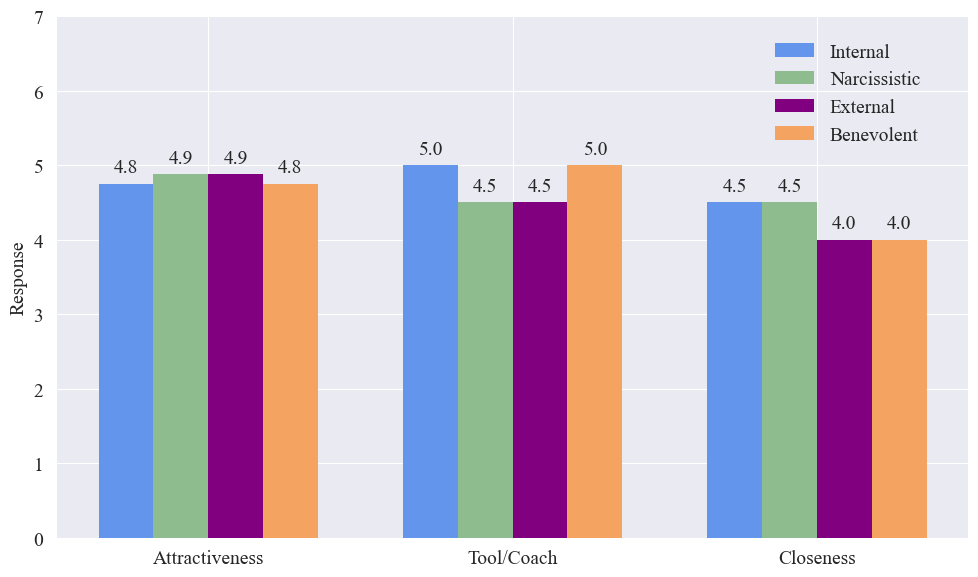

In [197]:
'''# Labels for each group
group_labels = ['Attractiveness', 'Tool/Coach', 'Closeness']

# Labels for each condition
condition_labels = ['Internal', 'Narcissistic', 'External', 'Benevolent']

data = [
    [4.75, 4.875, 4.875, 4.75],  # Group A
    [5.0, 4.5, 4.5, 5.0],  # Group B
    [4.5, 4.5, 4.0, 4.0],  # Group C
]
data = np.array(data)
num_groups, num_conditions = data.shape

colors = ['cornflowerblue', 'darkseagreen', 'purple', 'sandybrown']  # 1 per condition


x = np.arange(num_groups)  # positions for each group
bar_width = 0.18           # narrow bars so they fit
offsets = np.linspace(-bar_width*1.5, bar_width*1.5, num_conditions)  # for 4 bars per group
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each condition as a separate bar series
for i in range(num_conditions):
    ax.bar(
        x + offsets[i],
        data[:, i],
        width=bar_width,
        label=condition_labels[i],
        color=colors[i]
    )

# Aesthetics
ax.set_ylabel('Response')
ax.set_ylim(0, 7)
ax.set_xticks(x)
ax.set_xticklabels(group_labels)
ax.tick_params(axis='x', pad=8)
ax.tick_params(axis='y', pad=10)
ax.legend(loc=(0.78, 0.74))


# Optional: add bar labels
for i in range(num_conditions):
    for j in range(num_groups):
        height = data[j, i]
        ax.text(x[j] + offsets[i], height + 0.1, f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('./plot/fig_04.png', dpi=300)
plt.show()
'''

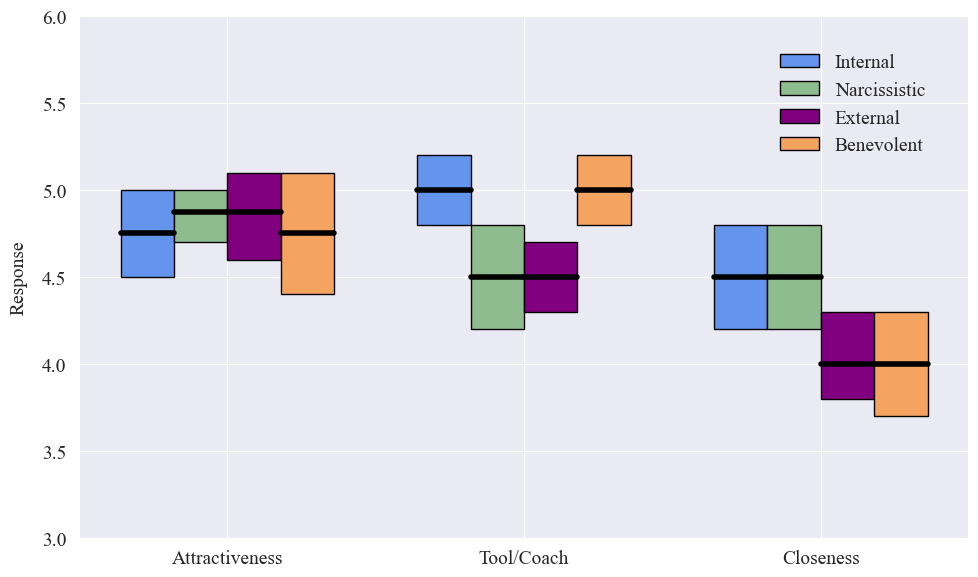

In [299]:
# Labels
group_labels = ['Attractiveness', 'Tool/Coach', 'Closeness']
condition_labels = ['Internal', 'Narcissistic', 'External', 'Benevolent']
colors = ['cornflowerblue', 'darkseagreen', 'purple', 'sandybrown']

# Box stats: [Q1, Median, Q3] for each condition per group
data = [
    [  # Attractiveness
        [4.5, 4.75, 5.0],
        [4.7, 4.875, 5.0],
        [4.6, 4.875, 5.1],
        [4.4, 4.75, 5.1],
    ],
    [  # Tool/Coach
        [4.8, 5.0, 5.2],
        [4.2, 4.5, 4.8],
        [4.3, 4.5, 4.7],
        [4.8, 5.0, 5.2],
    ],
    [  # Closeness
        [4.2, 4.5, 4.8],
        [4.2, 4.5, 4.8],
        [3.8, 4.0, 4.3],
        [3.7, 4.0, 4.3],
    ]
]

data = np.array(data)  # shape: (3 groups, 4 conditions, 3 stats)

x = np.arange(len(group_labels))
bar_width = 0.18
offsets = np.linspace(-bar_width*1.5, bar_width*1.5, len(condition_labels))

fig, ax = plt.subplots(figsize=(10, 6))

# Helper function to draw pseudo-boxes
def draw_box(ax, x_pos, q1, median, q3, color, label=None):
    # Draw box (Q1 to Q3)
    ax.add_patch(plt.Rectangle(
        (x_pos - bar_width/2, q1), bar_width, q3 - q1,
        facecolor=color, edgecolor='black', label=label
    ))
    # Draw median line
    ax.plot([x_pos - bar_width/2, x_pos + bar_width/2], [median, median],
            color='black', linewidth=4)

# Draw all pseudo-boxes
for g in range(len(group_labels)):
    for c in range(len(condition_labels)):
        q1, med, q3 = data[g, c]
        label = condition_labels[c] if g == 0 else None  # Only label once
        draw_box(ax, x[g] + offsets[c], q1, med, q3, color=colors[c], label=label)

# Aesthetics
ax.set_xticks(x)
ax.set_xticklabels(group_labels)
ax.set_ylim(3, 6)
ax.set_ylabel('Response', labelpad=10)
ax.tick_params(axis='x', pad=8)
ax.tick_params(axis='y', pad=10)
ax.legend(loc=(0.78, 0.72))

plt.tight_layout()
plt.savefig('./plot/fig_04.png', dpi=300)
plt.show()

#Box chart of perception attributes across all attribution styles

In [78]:
# Tool/Coach Comparison
i_data = df[df.columns[64]].iloc[0:8].tolist() + df[df.columns[64]].iloc[32:40].tolist()
n_data = df[df.columns[64]].iloc[8:16].tolist() + df[df.columns[64]].iloc[40:48].tolist()
e_data = df[df.columns[64]].iloc[16:24].tolist() + df[df.columns[64]].iloc[48:56].tolist()
b_data = df[df.columns[64]].iloc[24:32].tolist() + df[df.columns[64]].iloc[56:64].tolist()

# Kruskal-Wallis H Test
stat, p = kruskal(i_data, n_data, e_data, b_data)

# Effect Size
k, N = 4, 64  # number of groups, number of all entries
eta_squared = (stat - k + 1) / (N - k)

print(f"Kruskal-Wallis H Test Statistic: {stat}")
print(f"P-value: {p}")
print(f"Effect Size (η²): {eta_squared}")

Kruskal-Wallis H Test Statistic: 0.7780733600400755
P-value: 0.854704084084452
Effect Size (η²): -0.03703211066599874


In [80]:
i_data = pd.DataFrame(i_data, columns=['Values'])
print(i_data.median(), i_data.quantile(0.75) - i_data.quantile(0.25))

n_data = pd.DataFrame(n_data, columns=['Values'])
print(n_data.median(), n_data.quantile(0.75) - n_data.quantile(0.25))

e_data = pd.DataFrame(e_data, columns=['Values'])
print(e_data.median(), e_data.quantile(0.75) - e_data.quantile(0.25))

b_data = pd.DataFrame(b_data, columns=['Values'])
print(b_data.median(), b_data.quantile(0.75) - b_data.quantile(0.25))

Values    5.0
dtype: float64 Values    2.25
dtype: float64
Values    4.5
dtype: float64 Values    4.0
dtype: float64
Values    4.5
dtype: float64 Values    2.25
dtype: float64
Values    5.0
dtype: float64 Values    1.75
dtype: float64


In [130]:
dunn_data = {
    'Data': i_data + n_data + e_data + b_data,
    'Group': ['Internal'] * 16 + ['Narcissistic'] * 16 + ['External'] * 16 + ['Benevolent'] * 16
}

dunn_df = pd.DataFrame(dunn_data)
dunn_df['Group'] = dunn_df['Group'].astype(cat_type)

# Perform Dunn's Test
posthoc = posthoc_dunn(dunn_df, val_col='Data', group_col='Group', p_adjust=None)
print(posthoc)

              Internal  Narcissistic  External  Benevolent
Internal      1.000000      0.801093  0.391146    0.730857
Narcissistic  0.801093      1.000000  0.544775    0.926656
External      0.391146      0.544775  1.000000    0.607563
Benevolent    0.730857      0.926656  0.607563    1.000000


In [81]:
# Closeness Comparison
i_data = df[df.columns[66]].iloc[0:8].tolist() + df[df.columns[66]].iloc[32:40].tolist()
n_data = df[df.columns[66]].iloc[8:16].tolist() + df[df.columns[66]].iloc[40:48].tolist()
e_data = df[df.columns[66]].iloc[16:24].tolist() + df[df.columns[66]].iloc[48:56].tolist()
b_data = df[df.columns[66]].iloc[24:32].tolist() + df[df.columns[66]].iloc[56:64].tolist()

# Kruskal-Wallis H Test
stat, p = kruskal(i_data, n_data, e_data, b_data)

# Effect Size
k, N = 4, 64  # number of groups, number of all entries
eta_squared = (stat - k + 1) / (N - k)

print(f"Kruskal-Wallis H Test Statistic: {stat}")
print(f"P-value: {p}")
print(f"Effect Size (η²): {eta_squared}")

Kruskal-Wallis H Test Statistic: 0.6575493143653501
P-value: 0.8831403697577079
Effect Size (η²): -0.039040844760577495


In [83]:
i_data = pd.DataFrame(i_data, columns=['Values'])
print(i_data.median(), i_data.quantile(0.75) - i_data.quantile(0.25))

n_data = pd.DataFrame(n_data, columns=['Values'])
print(n_data.median(), n_data.quantile(0.75) - n_data.quantile(0.25))

e_data = pd.DataFrame(e_data, columns=['Values'])
print(e_data.median(), e_data.quantile(0.75) - e_data.quantile(0.25))

b_data = pd.DataFrame(b_data, columns=['Values'])
print(b_data.median(), b_data.quantile(0.75) - b_data.quantile(0.25))

Values    4.5
dtype: float64 Values    1.0
dtype: float64
Values    4.5
dtype: float64 Values    1.5
dtype: float64
Values    4.0
dtype: float64 Values    2.0
dtype: float64
Values    4.0
dtype: float64 Values    2.0
dtype: float64


In [132]:
dunn_data = {
    'Data': i_data + n_data + e_data + b_data,
    'Group': ['Internal'] * 16 + ['Narcissistic'] * 16 + ['External'] * 16 + ['Benevolent'] * 16
}

dunn_df = pd.DataFrame(dunn_data)
dunn_df['Group'] = dunn_df['Group'].astype(cat_type)

# Perform Dunn's Test
posthoc = posthoc_dunn(dunn_df, val_col='Data', group_col='Group', p_adjust=None)
print(posthoc)

              Internal  Narcissistic  External  Benevolent
Internal      1.000000      0.859832  0.569351    0.753570
Narcissistic  0.859832      1.000000  0.455911    0.623763
External      0.569351      0.455911  1.000000    0.798667
Benevolent    0.753570      0.623763  0.798667    1.000000


In [84]:
# Attractiveness Comparison
i_df = pd.concat([df[df.columns[[51, 52, 53, 55]]].iloc[0:8,], df[df.columns[[51, 52, 53, 55]]].iloc[32:40,]])
i_data = pd.DataFrame(i_data, columns=['Values'])
print(i_data.median(), i_data.quantile(0.75) - i_data.quantile(0.25))

n_data = pd.DataFrame(n_data, columns=['Values'])
print(n_data.median(), n_data.quantile(0.75) - n_data.quantile(0.25))

e_data = pd.DataFrame(e_data, columns=['Values'])
print(e_data.median(), e_data.quantile(0.75) - e_data.quantile(0.25))

b_data = pd.DataFrame(b_data, columns=['Values'])
print(b_data.median(), b_data.quantile(0.75) - b_data.quantile(0.25))n_df = pd.concat([df[df.columns[[51, 52, 53, 55]]].iloc[8:16,], df[df.columns[[51, 52, 53, 55]]].iloc[40:48,]])
e_df = pd.concat([df[df.columns[[51, 52, 53, 55]]].iloc[16:24,], df[df.columns[[51, 52, 53, 55]]].iloc[48:56,]])
b_df = pd.concat([df[df.columns[[51, 52, 53, 55]]].iloc[24:32,], df[df.columns[[51, 52, 53, 55]]].iloc[56:64,]])

temp_data, tracker = [], 0

for i in range(len(i_df)):
    tracker = (i_df.iloc[i, 0] + i_df.iloc[i, 1] + i_df.iloc[i, 2] + i_df.iloc[i, 3]) / 4
    temp_data.append(tracker)

i_data = temp_data
temp_data, tracker = [], 0

for i in range(len(n_df)):
    tracker = (n_df.iloc[i, 0] + n_df.iloc[i, 1] + n_df.iloc[i, 2] + n_df.iloc[i, 3]) / 4
    temp_data.append(tracker)

n_data = temp_data
temp_data, tracker = [], 0

for i in range(len(e_df)):
    tracker = (e_df.iloc[i, 0] + e_df.iloc[i, 1] + e_df.iloc[i, 2] + e_df.iloc[i, 3]) / 4
    temp_data.append(tracker)

e_data = temp_data
temp_data, tracker = [], 0

for i in range(len(b_df)):
    tracker = (b_df.iloc[i, 0] + b_df.iloc[i, 1] + b_df.iloc[i, 2] + b_df.iloc[i, 3]) / 4
    temp_data.append(tracker)

b_data = temp_data

# Kruskal-Wallis H Test
stat, p = kruskal(i_data, n_data, e_data, b_data)

# Effect Size
k, N = 4, 64  # number of groups, number of all entries
eta_squared = (stat - k + 1) / (N - k)

print(f"Kruskal-Wallis H Test Statistic: {stat}")
print(f"P-value: {p}")
print(f"Effect Size (η²): {eta_squared}")

Kruskal-Wallis H Test Statistic: 0.17082920962990242
P-value: 0.9821551109220894
Effect Size (η²): -0.04715284650616829


In [85]:
i_data = pd.DataFrame(i_data, columns=['Values'])
print(i_data.median(), i_data.quantile(0.75) - i_data.quantile(0.25))

n_data = pd.DataFrame(n_data, columns=['Values'])
print(n_data.median(), n_data.quantile(0.75) - n_data.quantile(0.25))

e_data = pd.DataFrame(e_data, columns=['Values'])
print(e_data.median(), e_data.quantile(0.75) - e_data.quantile(0.25))

b_data = pd.DataFrame(b_data, columns=['Values'])
print(b_data.median(), b_data.quantile(0.75) - b_data.quantile(0.25))

Values    4.75
dtype: float64 Values    1.4375
dtype: float64
Values    4.875
dtype: float64 Values    1.75
dtype: float64
Values    4.875
dtype: float64 Values    1.1875
dtype: float64
Values    4.75
dtype: float64 Values    1.375
dtype: float64


In [135]:
dunn_data = {
    'Data': i_data + n_data + e_data + b_data,
    'Group': ['Internal'] * 16 + ['Narcissistic'] * 16 + ['External'] * 16 + ['Benevolent'] * 16
}

dunn_df = pd.DataFrame(dunn_data)
dunn_df['Group'] = dunn_df['Group'].astype(cat_type)

# Perform Dunn's Test
posthoc = posthoc_dunn(dunn_df, val_col='Data', group_col='Group', p_adjust=None)
print(posthoc)

              Internal  Narcissistic  External  Benevolent
Internal      1.000000      0.984810  0.728238    0.897740
Narcissistic  0.984810      1.000000  0.713984    0.882693
External      0.728238      0.713984  1.000000    0.826686
Benevolent    0.897740      0.882693  0.826686    1.000000


In [237]:
df[df.columns[[7]]].iloc[0:8,], df[df.columns[[7]]].iloc[32:40,]

(   7. 我认同NAO对我的正面评价，我认为自己确实表现得不错
 0                              5
 1                              4
 2                              4
 3                              4
 4                              4
 5                              3
 6                              4
 7                              5,
     7. 我认同NAO对我的正面评价，我认为自己确实表现得不错
 32                              6
 33                              5
 34                              2
 35                              2
 36                              4
 37                              5
 38                              3
 39                              4)

In [254]:
temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

(np.float64(6.0), np.float64(5.0), np.float64(7.0))

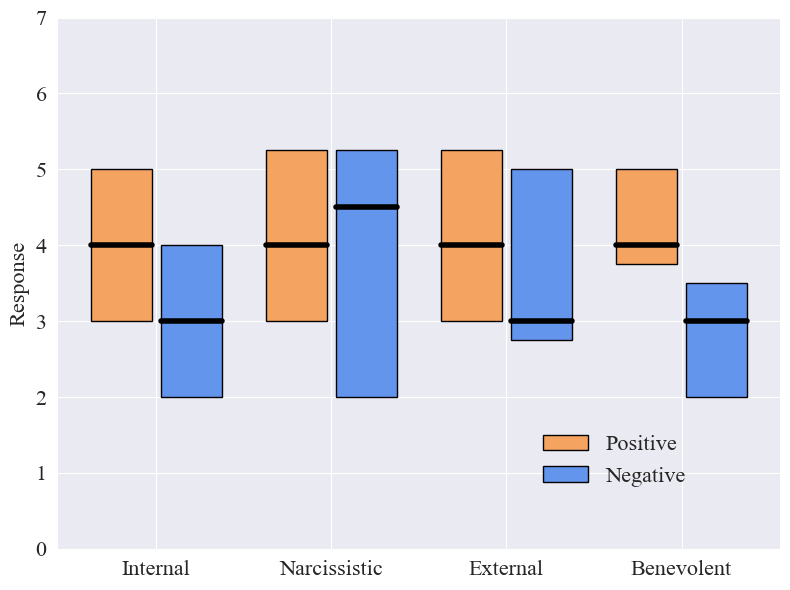

In [32]:
temp_df = pd.concat([df[df.columns[[10]]].iloc[0:8,], df[df.columns[[10]]].iloc[32:40,]])
I_M, I_QL, I_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[10]]].iloc[8:16,], df[df.columns[[10]]].iloc[40:48,]])
N_M, N_QL, N_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[10]]].iloc[16:24,], df[df.columns[[10]]].iloc[48:56,]])
E_M, E_QL, E_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[10]]].iloc[24:32,], df[df.columns[[10]]].iloc[56:64,]])
B_M, B_QL, B_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[14]]].iloc[0:8,], df[df.columns[[14]]].iloc[32:40,]])
I_M1, I_QL1, I_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[14]]].iloc[8:16,], df[df.columns[[14]]].iloc[40:48,]])
N_M1, N_QL1, N_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[14]]].iloc[16:24,], df[df.columns[[14]]].iloc[48:56,]])
E_M1, E_QL1, E_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[14]]].iloc[24:32,], df[df.columns[[14]]].iloc[56:64,]])
B_M1, B_QL1, B_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

group_names = ['Internal', 'Narcissistic', 'External', 'Benevolent']

positive_stats = [
    [I_QL, I_M, I_QH],
    [N_QL, N_M, N_QH],
    [E_QL, E_M, E_QH],
    [B_QL, B_M, B_QH],
]

negative_stats = [
    [I_QL1, I_M1, I_QH1],
    [N_QL1, N_M1, N_QH1],
    [E_QL1, E_M1, E_QH1],
    [B_QL1, B_M1, B_QH1],
]

x = np.arange(len(group_names))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

# Helper to draw each pseudo-box
def draw_box(ax, x_pos, stats, color, label=None):
    q1, median, q3 = stats
    # Draw box
    ax.add_patch(plt.Rectangle(
        (x_pos - bar_width/2, q1), bar_width, q3 - q1,
        facecolor=color, edgecolor='black', label=label if label else None
    ))
    # Draw median line
    ax.plot([x_pos - bar_width/2, x_pos + bar_width/2], [median, median], color='black', linewidth=4)

# Draw all boxes
for i in range(len(group_names)):
    draw_box(ax, x[i] - 0.2, stats=positive_stats[i], color='sandybrown', label='Positive' if i == 0 else None)
    draw_box(ax, x[i] + 0.2, stats=negative_stats[i], color='cornflowerblue', label='Negative' if i == 0 else None)

# Axis settings
ax.set_ylim(0, 7)
ax.set_xticks(x)
ax.set_xticklabels(group_names)
ax.set_ylabel('Response', fontsize=16)
ax.tick_params(axis='x', pad=8, labelsize=16)
ax.tick_params(axis='y', pad=8, labelsize=16)
ax.legend(loc=(0.66, 0.1), fontsize=16)

plt.tight_layout()
plt.savefig('./plot/fig_05.png', dpi=300, bbox_inches='tight')
plt.show()

#Box chart of participants attribution style across all groups

In [200]:
df[df.columns[[3, 5]]]

,3. 我能够感受到机器人把好的结果归因到了,5. 我能够感受到机器人把不好的结果归因到了
0,3,3
1,2,6
2,3,2
3,5,4
4,6,6
...,...,...
59,1,1
60,5,3
61,2,7
62,3,4


In [203]:
temp_df = pd.concat([df[df.columns[[3]]].iloc[0:8,], df[df.columns[[3]]].iloc[32:40,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

3. 我能够感受到机器人把好的结果归因到了    3.0
dtype: float64 3. 我能够感受到机器人把好的结果归因到了    1.75
Name: 0.25, dtype: float64 3. 我能够感受到机器人把好的结果归因到了    4.0
Name: 0.75, dtype: float64


In [204]:
temp_df = pd.concat([df[df.columns[[3]]].iloc[8:16,], df[df.columns[[3]]].iloc[40:48,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

3. 我能够感受到机器人把好的结果归因到了    3.0
dtype: float64 3. 我能够感受到机器人把好的结果归因到了    2.0
Name: 0.25, dtype: float64 3. 我能够感受到机器人把好的结果归因到了    5.25
Name: 0.75, dtype: float64


In [205]:
temp_df = pd.concat([df[df.columns[[3]]].iloc[16:24,], df[df.columns[[3]]].iloc[48:56,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

3. 我能够感受到机器人把好的结果归因到了    4.5
dtype: float64 3. 我能够感受到机器人把好的结果归因到了    3.0
Name: 0.25, dtype: float64 3. 我能够感受到机器人把好的结果归因到了    6.25
Name: 0.75, dtype: float64


In [202]:
temp_df = pd.concat([df[df.columns[[3]]].iloc[24:32,], df[df.columns[[3]]].iloc[56:64,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

3. 我能够感受到机器人把好的结果归因到了    3.0
dtype: float64 3. 我能够感受到机器人把好的结果归因到了    2.0
Name: 0.25, dtype: float64 3. 我能够感受到机器人把好的结果归因到了    3.5
Name: 0.75, dtype: float64


In [207]:
temp_df = pd.concat([df[df.columns[[5]]].iloc[0:8,], df[df.columns[[5]]].iloc[32:40,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

5. 我能够感受到机器人把不好的结果归因到了    5.0
dtype: float64 5. 我能够感受到机器人把不好的结果归因到了    3.75
Name: 0.25, dtype: float64 5. 我能够感受到机器人把不好的结果归因到了    6.0
Name: 0.75, dtype: float64


In [208]:
temp_df = pd.concat([df[df.columns[[5]]].iloc[8:16,], df[df.columns[[5]]].iloc[40:48,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

5. 我能够感受到机器人把不好的结果归因到了    4.5
dtype: float64 5. 我能够感受到机器人把不好的结果归因到了    2.0
Name: 0.25, dtype: float64 5. 我能够感受到机器人把不好的结果归因到了    6.0
Name: 0.75, dtype: float64


In [209]:
temp_df = pd.concat([df[df.columns[[5]]].iloc[16:24,], df[df.columns[[5]]].iloc[48:56,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

5. 我能够感受到机器人把不好的结果归因到了    3.0
dtype: float64 5. 我能够感受到机器人把不好的结果归因到了    2.0
Name: 0.25, dtype: float64 5. 我能够感受到机器人把不好的结果归因到了    6.0
Name: 0.75, dtype: float64


In [210]:
temp_df = pd.concat([df[df.columns[[5]]].iloc[24:32,], df[df.columns[[5]]].iloc[56:64,]])
print(temp_df.median(), temp_df.quantile(0.25), temp_df.quantile(0.75))

5. 我能够感受到机器人把不好的结果归因到了    3.0
dtype: float64 5. 我能够感受到机器人把不好的结果归因到了    2.0
Name: 0.25, dtype: float64 5. 我能够感受到机器人把不好的结果归因到了    5.25
Name: 0.75, dtype: float64


In [213]:
temp_df = pd.concat([df[df.columns[[3]]].iloc[24:32,], df[df.columns[[3]]].iloc[56:64,]])

In [219]:
pd.concat([df[df.columns[[5]]].iloc[16:24,], df[df.columns[[5]]].iloc[48:56,]]).mean()

5. 我能够感受到机器人把不好的结果归因到了    3.625
dtype: float64

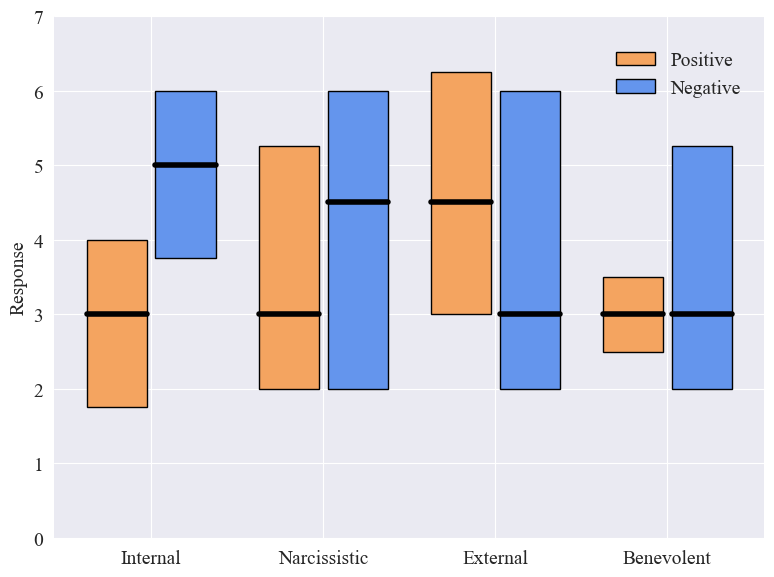

In [290]:
group_names = ['Internal', 'Narcissistic', 'External', 'Benevolent']

positive_stats = [
    [1.75, 3.0, 4.0],
    [2.0, 3.0, 5.25],
    [3.0, 4.5, 6.25],
    [2.5, 3.0, 3.5],
]

negative_stats = [
    [3.75, 5.0, 6.0],
    [2.0, 4.5, 6.0],
    [2.0, 3.0, 6.0],
    [2.0, 3.0, 5.25],
]

x = np.arange(len(group_names))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

# Helper to draw each pseudo-box
def draw_box(ax, x_pos, stats, color, label=None):
    q1, median, q3 = stats
    # Draw box
    ax.add_patch(plt.Rectangle(
        (x_pos - bar_width/2, q1), bar_width, q3 - q1,
        facecolor=color, edgecolor='black', label=label if label else None
    ))
    # Draw median line
    ax.plot([x_pos - bar_width/2, x_pos + bar_width/2], [median, median], color='black', linewidth=4)

# Draw all boxes
for i in range(len(group_names)):
    draw_box(ax, x[i] - 0.2, positive_stats[i], color='sandybrown', label='Positive' if i == 0 else None)
    draw_box(ax, x[i] + 0.2, negative_stats[i], color='cornflowerblue', label='Negative' if i == 0 else None)

# Axis settings
ax.set_ylim(0, 7)
ax.set_xticks(x)
ax.set_xticklabels(group_names)
ax.set_ylabel('Response')
ax.tick_params(axis='x', pad=8)
ax.tick_params(axis='y', pad=8)
ax.legend(loc=(0.78, 0.83))

plt.tight_layout()
plt.savefig('./plot/fig_06.png', dpi=300, bbox_inches='tight')
plt.show
#Box chart of attribution styles across all groups for manipulation check

In [29]:
style_df.iloc[1, ]

3. 我能够感受到机器人把好的结果归因到了     2
5. 我能够感受到机器人把不好的结果归因到了    6
Name: 1, dtype: int64

In [53]:
internal, external = 0, 0

style_df = df[df.columns[[3, 5]]].iloc[:,]

for i in range(len(style_df)):
    if style_df.iloc[i, 0] == style_df.iloc[i, 1]:
        if style_df.iloc[i, 0] > 4:
            external += 1
        else:
            internal += 1
        
print(internal, external)

15 3


In [56]:
i_count, n_count, e_count, b_count = 0, 0, 0, 0

style_df = df[df.columns[[3, 5]]].iloc[:,]

for i in range(len(style_df)):
    if style_df.iloc[i, 0] == 4 or style_df.iloc[i, 1] == 4:
        print(i, style_df.iloc[i, 0], style_df.iloc[i, 1])
    else:
        if style_df.iloc[i, 0] > 4 and style_df.iloc[i, 1] > 4:
            i_count += 1
        elif style_df.iloc[i, 0] > 4 and style_df.iloc[i, 1] < 4:
            n_count += 1
        elif style_df.iloc[i, 0] < 4 and style_df.iloc[i, 1] > 4:
            e_count += 1
        elif style_df.iloc[i, 0] < 4 and style_df.iloc[i, 1] < 4:
            b_count += 1

print(i_count, n_count, e_count, b_count)

3 5 4
7 4 6
22 4 7
23 4 2
32 4 4
33 4 6
37 6 4
54 6 4
55 4 4
62 3 4
7 11 17 19


In [33]:
df[df.columns[[6]]].value_counts()

6. 我能够感受到机器人给我的评价
正面评价和负面评价相当          39
正面评价更多               24
负面评价更多                1
Name: count, dtype: int64

In [51]:
pd.concat([df[df.columns[[4]]].iloc[24:32,], df[df.columns[[4]]].iloc[56:64,]])

,4. 我能够感受到机器人的负面评价，如「做得不对」、「完成得不好」
24,6
25,7
26,5
27,5
28,5
29,7
30,7
31,6
56,7
57,7


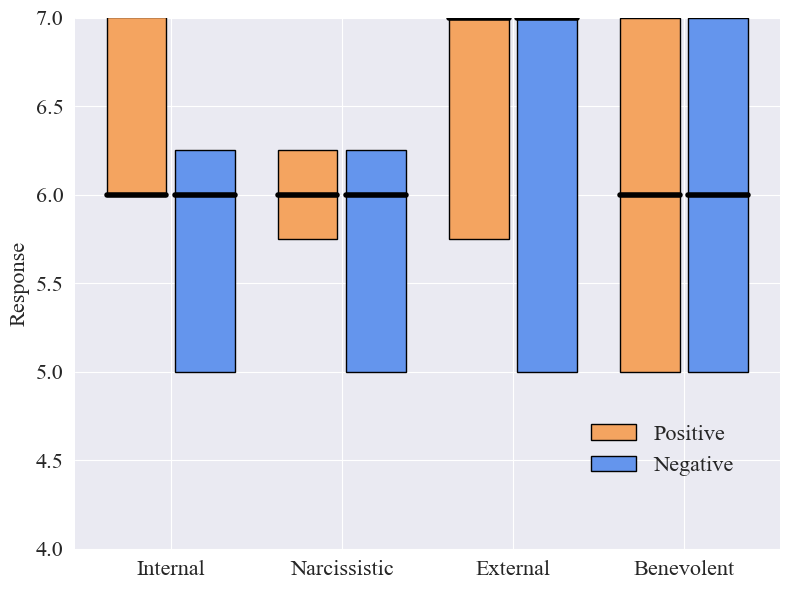

In [18]:
temp_df = pd.concat([df[df.columns[[2]]].iloc[0:8,], df[df.columns[[2]]].iloc[32:40,]])
I_M, I_QL, I_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[2]]].iloc[8:16,], df[df.columns[[2]]].iloc[40:48,]])
N_M, N_QL, N_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[2]]].iloc[16:24,], df[df.columns[[2]]].iloc[48:56,]])
E_M, E_QL, E_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[2]]].iloc[24:32,], df[df.columns[[2]]].iloc[56:64,]])
B_M, B_QL, B_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[4]]].iloc[0:8,], df[df.columns[[4]]].iloc[32:40,]])
I_M1, I_QL1, I_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[4]]].iloc[8:16,], df[df.columns[[4]]].iloc[40:48,]])
N_M1, N_QL1, N_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[4]]].iloc[16:24,], df[df.columns[[4]]].iloc[48:56,]])
E_M1, E_QL1, E_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[4]]].iloc[24:32,], df[df.columns[[4]]].iloc[56:64,]])
B_M1, B_QL1, B_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

group_names = ['Internal', 'Narcissistic', 'External', 'Benevolent']

positive_stats = [
    [I_QL, I_M, I_QH],
    [N_QL, N_M, N_QH],
    [E_QL, E_M, E_QH],
    [B_QL, B_M, B_QH],
]

negative_stats = [
    [I_QL1, I_M1, I_QH1],
    [N_QL1, N_M1, N_QH1],
    [E_QL1, E_M1, E_QH1],
    [B_QL1, B_M1, B_QH1],
]

x = np.arange(len(group_names))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

# Helper to draw each pseudo-box
def draw_box(ax, x_pos, stats, color, label=None):
    q1, median, q3 = stats
    # Draw box
    ax.add_patch(plt.Rectangle(
        (x_pos - bar_width/2, q1), bar_width, q3 - q1,
        facecolor=color, edgecolor='black', label=label if label else None
    ))
    # Draw median line
    ax.plot([x_pos - bar_width/2, x_pos + bar_width/2], [median, median], color='black', linewidth=4)

# Draw all boxes
for i in range(len(group_names)):
    draw_box(ax, x[i] - 0.2, stats=positive_stats[i], color='sandybrown', label='Positive' if i == 0 else None)
    draw_box(ax, x[i] + 0.2, stats=negative_stats[i], color='cornflowerblue', label='Negative' if i == 0 else None)

# Axis settings
ax.set_ylim(4, 7)
ax.set_xticks(x)
ax.set_xticklabels(group_names, fontsize=16)
ax.set_ylabel('Response', fontsize=16)
ax.tick_params(axis='x', pad=8)
ax.tick_params(axis='y', pad=8, labelsize=16)
ax.legend(loc=(0.72, 0.12), fontsize=16)

plt.tight_layout()
plt.savefig('./plot/fig_07.png', dpi=300, bbox_inches='tight')
plt.show()

#Box chart of feedback valence across attribution styles for manipulation check

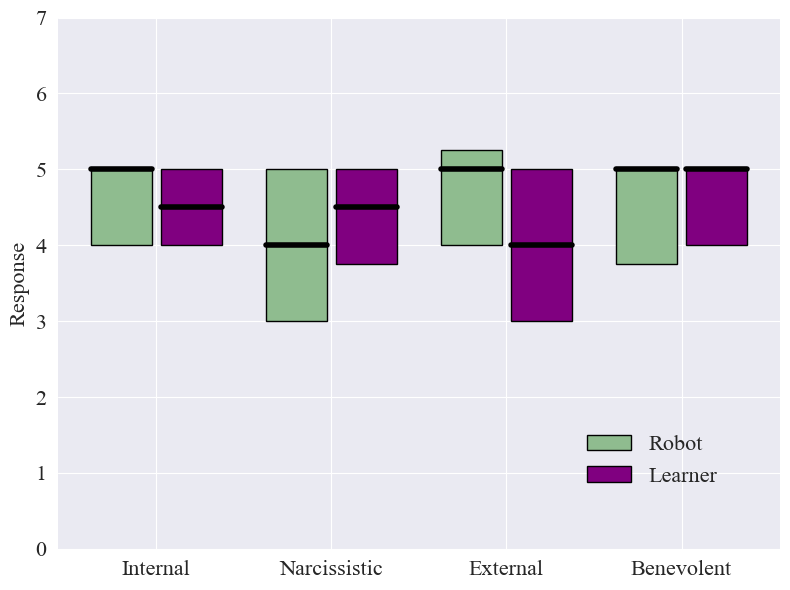

In [21]:
temp_df = pd.concat([df[df.columns[[15, 18, 21]]].iloc[0:8,], df[df.columns[[15, 18, 21]]].iloc[32:40,]])
I_M, I_QL, I_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[15, 18, 21]]].iloc[8:16,], df[df.columns[[15, 18, 21]]].iloc[40:48,]])
N_M, N_QL, N_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[15, 18, 21]]].iloc[16:24,], df[df.columns[[15, 18, 21]]].iloc[48:56,]])
E_M, E_QL, E_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[15, 18, 21]]].iloc[24:32,], df[df.columns[[15, 18, 21]]].iloc[56:64,]])
B_M, B_QL, B_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[16, 19, 22]]].iloc[0:8,], df[df.columns[[16, 19, 22]]].iloc[32:40,]])
I_M1, I_QL1, I_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[16, 19, 22]]].iloc[8:16,], df[df.columns[[16, 19, 22]]].iloc[40:48,]])
N_M1, N_QL1, N_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[16, 19, 22]]].iloc[16:24,], df[df.columns[[16, 19, 22]]].iloc[48:56,]])
E_M1, E_QL1, E_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[16, 19, 22]]].iloc[24:32,], df[df.columns[[16, 19, 22]]].iloc[56:64,]])
B_M1, B_QL1, B_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

group_names = ['Internal', 'Narcissistic', 'External', 'Benevolent']

robot_stats = [
    [I_QL, I_M, I_QH],
    [N_QL, N_M, N_QH],
    [E_QL, E_M, E_QH],
    [B_QL, B_M, B_QH],
]

learner_stats = [
    [I_QL1, I_M1, I_QH1],
    [N_QL1, N_M1, N_QH1],
    [E_QL1, E_M1, E_QH1],
    [B_QL1, B_M1, B_QH1],
]

x = np.arange(len(group_names))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

# Helper to draw each pseudo-box
def draw_box(ax, x_pos, stats, color, label=None):
    q1, median, q3 = stats
    # Draw box
    ax.add_patch(plt.Rectangle(
        (x_pos - bar_width/2, q1), bar_width, q3 - q1,
        facecolor=color, edgecolor='black', label=label if label else None
    ))
    # Draw median line
    ax.plot([x_pos - bar_width/2, x_pos + bar_width/2], [median, median], color='black', linewidth=4)

# Draw all boxes
for i in range(len(group_names)):
    draw_box(ax, x[i] - 0.2, stats=robot_stats[i], color='darkseagreen', label='Robot' if i == 0 else None)
    draw_box(ax, x[i] + 0.2, stats=learner_stats[i], color='purple', label='Learner' if i == 0 else None)

# Axis settings
ax.set_ylim(0, 7)
ax.set_xticks(x)
ax.set_xticklabels(group_names)
ax.set_ylabel('Response', fontsize=16)
ax.tick_params(axis='x', pad=8, labelsize=16)
ax.tick_params(axis='y', pad=8, labelsize=16)
ax.legend(loc=(0.72, 0.1), fontsize=16)

plt.tight_layout()
plt.savefig('./plot/fig_08.png', dpi=300, bbox_inches='tight')
plt.show()

#Box chart of credit attribution between attribution styles for robot/learner

In [66]:
#H5a: Participants would attribute more credit to the robot when attribution styles are more considerate of the learner’s effort and avoid self-serving explanations.

i_df = pd.concat([df[df.columns[[15, 18, 21]]].iloc[0:8,], df[df.columns[[15, 18, 21]]].iloc[32:40,]])
n_df = pd.concat([df[df.columns[[15, 18, 21]]].iloc[8:16,], df[df.columns[[15, 18, 21]]].iloc[40:48,]])
e_df = pd.concat([df[df.columns[[15, 18, 21]]].iloc[16:24,], df[df.columns[[15, 18, 21]]].iloc[48:56,]])
b_df = pd.concat([df[df.columns[[15, 18, 21]]].iloc[24:32,], df[df.columns[[15, 18, 21]]].iloc[56:64,]])

temp_data, tracker = [], 0

for i in range(len(i_df)):
    tracker = (i_df.iloc[i, 0] + i_df.iloc[i, 1] + i_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

i_data = temp_data
temp_data, tracker = [], 0

for i in range(len(n_df)):
    tracker = (n_df.iloc[i, 0] + n_df.iloc[i, 1] + n_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

n_data = temp_data
temp_data, tracker = [], 0

for i in range(len(e_df)):
    tracker = (e_df.iloc[i, 0] + e_df.iloc[i, 1] + e_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

e_data = temp_data
temp_data, tracker = [], 0

for i in range(len(b_df)):
    tracker = (b_df.iloc[i, 0] + b_df.iloc[i, 1] + b_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

b_data = temp_data

# Kruskal-Wallis H Test
stat, p = kruskal(i_data, n_data, e_data, b_data)

# Effect Size
k, N = 4, 64  # number of groups, number of all entries
eta_squared = (stat - k + 1) / (N - k)

print(f"Kruskal-Wallis H Test Statistic: {stat}")
print(f"P-value: {p}")
print(f"Effect Size (η²): {eta_squared}")

Kruskal-Wallis H Test Statistic: 7.427480064442854
P-value: 0.05945137154373239
Effect Size (η²): 0.07379133440738089


In [64]:
i_data = pd.DataFrame(i_data, columns=['Values'])
print(i_data.median(), i_data.quantile(0.75) - i_data.quantile(0.25))

n_data = pd.DataFrame(n_data, columns=['Values'])
print(n_data.median(), n_data.quantile(0.75) - n_data.quantile(0.25))

e_data = pd.DataFrame(e_data, columns=['Values'])
print(e_data.median(), e_data.quantile(0.75) - e_data.quantile(0.25))

b_data = pd.DataFrame(b_data, columns=['Values'])
print(b_data.median(), b_data.quantile(0.75) - b_data.quantile(0.25))

Values    4.166667
dtype: float64 Values    1.666667
dtype: float64
Values    4.0
dtype: float64 Values    1.75
dtype: float64
Values    3.833333
dtype: float64 Values    0.833333
dtype: float64
Values    4.666667
dtype: float64 Values    1.166667
dtype: float64


In [67]:
dunn_data = {
    'Data': i_data + n_data + e_data + b_data,
    'Group': ['Internal'] * 16 + ['Narcissistic'] * 16 + ['External'] * 16 + ['Benevolent'] * 16
}

dunn_df = pd.DataFrame(dunn_data)
dunn_df['Group'] = dunn_df['Group'].astype(cat_type)

# Perform Dunn's Test
posthoc = posthoc_dunn(dunn_df, val_col='Data', group_col='Group', p_adjust=None)
print(posthoc)

              Internal  Narcissistic  External  Benevolent
Internal      1.000000      0.016701  0.660318    0.082916
Narcissistic  0.016701      1.000000  0.050731    0.509760
External      0.660318      0.050731  1.000000    0.195480
Benevolent    0.082916      0.509760  0.195480    1.000000


In [68]:
#H5b: Participants would attribute less credit to themselves when attribution styles are more considerate of the learner’s effort and avoid self-serving explanations.

i_df = pd.concat([df[df.columns[[16, 19, 22]]].iloc[0:8,], df[df.columns[[16, 19, 22]]].iloc[32:40,]])
n_df = pd.concat([df[df.columns[[16, 19, 22]]].iloc[8:16,], df[df.columns[[16, 19, 22]]].iloc[40:48,]])
e_df = pd.concat([df[df.columns[[16, 19, 22]]].iloc[16:24,], df[df.columns[[16, 19, 22]]].iloc[48:56,]])
b_df = pd.concat([df[df.columns[[16, 19, 22]]].iloc[24:32,], df[df.columns[[16, 19, 22]]].iloc[56:64,]])

temp_data, tracker = [], 0

for i in range(len(i_df)):
    tracker = (i_df.iloc[i, 0] + i_df.iloc[i, 1] + i_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

i_data = temp_data
temp_data, tracker = [], 0

for i in range(len(n_df)):
    tracker = (n_df.iloc[i, 0] + n_df.iloc[i, 1] + n_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

n_data = temp_data
temp_data, tracker = [], 0

for i in range(len(e_df)):
    tracker = (e_df.iloc[i, 0] + e_df.iloc[i, 1] + e_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

e_data = temp_data
temp_data, tracker = [], 0

for i in range(len(b_df)):
    tracker = (b_df.iloc[i, 0] + b_df.iloc[i, 1] + b_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

b_data = temp_data

# Kruskal-Wallis H Test
stat, p = kruskal(i_data, n_data, e_data, b_data)

# Effect Size
k, N = 4, 64  # number of groups, number of all entries
eta_squared = (stat - k + 1) / (N - k)

print(f"Kruskal-Wallis H Test Statistic: {stat}")
print(f"P-value: {p}")
print(f"Effect Size (η²): {eta_squared}")

Kruskal-Wallis H Test Statistic: 4.507519354163771
P-value: 0.21162055797815782
Effect Size (η²): 0.025125322569396178


In [69]:
i_data = pd.DataFrame(i_data, columns=['Values'])
print(i_data.median(), i_data.quantile(0.75) - i_data.quantile(0.25))

n_data = pd.DataFrame(n_data, columns=['Values'])
print(n_data.median(), n_data.quantile(0.75) - n_data.quantile(0.25))

e_data = pd.DataFrame(e_data, columns=['Values'])
print(e_data.median(), e_data.quantile(0.75) - e_data.quantile(0.25))

b_data = pd.DataFrame(b_data, columns=['Values'])
print(b_data.median(), b_data.quantile(0.75) - b_data.quantile(0.25))

Values    4.166667
dtype: float64 Values    1.666667
dtype: float64
Values    4.0
dtype: float64 Values    1.75
dtype: float64
Values    3.833333
dtype: float64 Values    0.833333
dtype: float64
Values    4.666667
dtype: float64 Values    1.166667
dtype: float64


In [82]:
dunn_data = {
    'Data': i_data + n_data + e_data + b_data,
    'Group': ['Internal'] * 16 + ['Narcissistic'] * 16 + ['External'] * 16 + ['Benevolent'] * 16
}

dunn_df = pd.DataFrame(dunn_data)
dunn_df['Group'] = dunn_df['Group'].astype(cat_type)

# Perform Dunn's Test
posthoc = posthoc_dunn(dunn_df, val_col='Data', group_col='Group', p_adjust=None)
print(posthoc)

              Internal  Narcissistic  External  Benevolent
Internal      1.000000      0.755840  0.378738    0.222512
Narcissistic  0.755840      1.000000  0.233586    0.363389
External      0.378738      0.233586  1.000000    0.035720
Benevolent    0.222512      0.363389  0.035720    1.000000


In [83]:
# Calculate Cliff's Delta
delta, effect = cliffs_delta(e_data, b_data)
print(f"Cliff's Delta: {delta}, Effect Size Interpretation: {effect}")

Cliff's Delta: -0.44140625, Effect Size Interpretation: medium


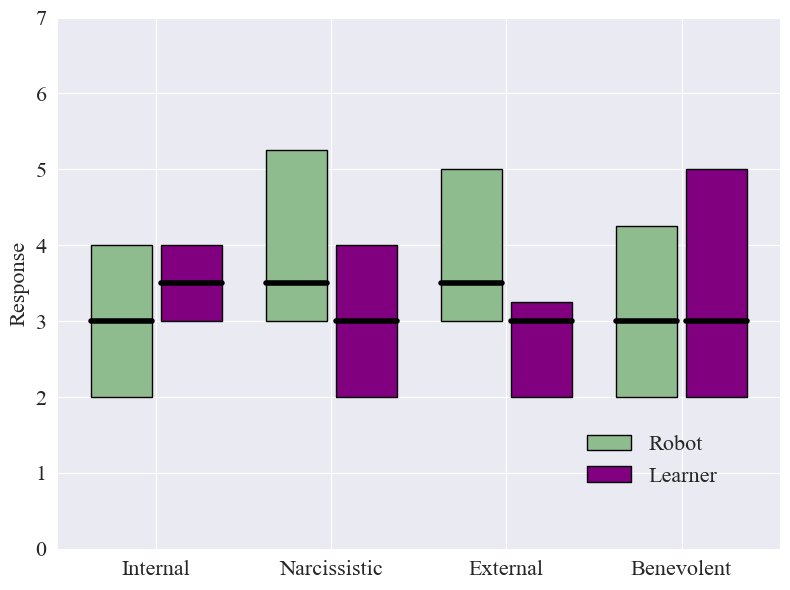

In [22]:
temp_df = pd.concat([df[df.columns[[24, 27, 30]]].iloc[0:8,], df[df.columns[[24, 27, 30]]].iloc[32:40,]])
I_M, I_QL, I_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[24, 27, 30]]].iloc[8:16,], df[df.columns[[24, 27, 30]]].iloc[40:48,]])
N_M, N_QL, N_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[24, 27, 30]]].iloc[16:24,], df[df.columns[[24, 27, 30]]].iloc[48:56,]])
E_M, E_QL, E_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[24, 27, 30]]].iloc[24:32,], df[df.columns[[24, 27, 30]]].iloc[56:64,]])
B_M, B_QL, B_QH = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[25, 28, 31]]].iloc[0:8,], df[df.columns[[25, 28, 31]]].iloc[32:40,]])
I_M1, I_QL1, I_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[25, 28, 31]]].iloc[8:16,], df[df.columns[[25, 28, 31]]].iloc[40:48,]])
N_M1, N_QL1, N_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[25, 28, 31]]].iloc[16:24,], df[df.columns[[25, 28, 31]]].iloc[48:56,]])
E_M1, E_QL1, E_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

temp_df = pd.concat([df[df.columns[[25, 28, 31]]].iloc[24:32,], df[df.columns[[25, 28, 31]]].iloc[56:64,]])
B_M1, B_QL1, B_QH1 = temp_df.median().iloc[0], temp_df.quantile(0.25).iloc[0], temp_df.quantile(0.75).iloc[0]

group_names = ['Internal', 'Narcissistic', 'External', 'Benevolent']

robot_stats = [
    [I_QL, I_M, I_QH],
    [N_QL, N_M, N_QH],
    [E_QL, E_M, E_QH],
    [B_QL, B_M, B_QH],
]

learner_stats = [
    [I_QL1, I_M1, I_QH1],
    [N_QL1, N_M1, N_QH1],
    [E_QL1, E_M1, E_QH1],
    [B_QL1, B_M1, B_QH1],
]

x = np.arange(len(group_names))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

# Helper to draw each pseudo-box
def draw_box(ax, x_pos, stats, color, label=None):
    q1, median, q3 = stats
    # Draw box
    ax.add_patch(plt.Rectangle(
        (x_pos - bar_width/2, q1), bar_width, q3 - q1,
        facecolor=color, edgecolor='black', label=label if label else None
    ))
    # Draw median line
    ax.plot([x_pos - bar_width/2, x_pos + bar_width/2], [median, median], color='black', linewidth=4)

# Draw all boxes
for i in range(len(group_names)):
    draw_box(ax, x[i] - 0.2, stats=robot_stats[i], color='darkseagreen', label='Robot' if i == 0 else None)
    draw_box(ax, x[i] + 0.2, stats=learner_stats[i], color='purple', label='Learner' if i == 0 else None)

# Axis settings
ax.set_ylim(0, 7)
ax.set_xticks(x)
ax.set_xticklabels(group_names)
ax.set_ylabel('Response', fontsize=16)
ax.tick_params(axis='x', pad=8, labelsize=16)
ax.tick_params(axis='y', pad=8, labelsize=16)
ax.legend(loc=(0.72, 0.1), fontsize=16)

plt.tight_layout()
plt.savefig('./plot/fig_09.png', dpi=300, bbox_inches='tight')
plt.show()

#Box chart of blame attribution between attribution styles for robot/learner

In [73]:
#H6a: Participants would attribute more blame to the robot when attribution styles are less considerate of the learner’s effort and emphasize self-serving explanations.

i_df = pd.concat([df[df.columns[[24, 27, 30]]].iloc[0:8,], df[df.columns[[24, 27, 30]]].iloc[32:40,]])
n_df = pd.concat([df[df.columns[[24, 27, 30]]].iloc[8:16,], df[df.columns[[24, 27, 30]]].iloc[40:48,]])
e_df = pd.concat([df[df.columns[[24, 27, 30]]].iloc[16:24,], df[df.columns[[24, 27, 30]]].iloc[48:56,]])
b_df = pd.concat([df[df.columns[[24, 27, 30]]].iloc[24:32,], df[df.columns[[24, 27, 30]]].iloc[56:64,]])

temp_data, tracker = [], 0

for i in range(len(i_df)):
    tracker = (i_df.iloc[i, 0] + i_df.iloc[i, 1] + i_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

i_data = temp_data
temp_data, tracker = [], 0

for i in range(len(n_df)):
    tracker = (n_df.iloc[i, 0] + n_df.iloc[i, 1] + n_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

n_data = temp_data
temp_data, tracker = [], 0

for i in range(len(e_df)):
    tracker = (e_df.iloc[i, 0] + e_df.iloc[i, 1] + e_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

e_data = temp_data
temp_data, tracker = [], 0

for i in range(len(b_df)):
    tracker = (b_df.iloc[i, 0] + b_df.iloc[i, 1] + b_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

b_data = temp_data

# Kruskal-Wallis H Test
stat, p = kruskal(i_data, n_data, e_data, b_data)

# Effect Size
k, N = 4, 64  # number of groups, number of all entries
eta_squared = (stat - k + 1) / (N - k)

print(f"Kruskal-Wallis H Test Statistic: {stat}")
print(f"P-value: {p}")
print(f"Effect Size (η²): {eta_squared}")

Kruskal-Wallis H Test Statistic: 2.1166960060025484
P-value: 0.5485424394734348
Effect Size (η²): -0.014721733233290861


In [71]:
i_data = pd.DataFrame(i_data, columns=['Values'])
print(i_data.median(), i_data.quantile(0.75) - i_data.quantile(0.25))

n_data = pd.DataFrame(n_data,  =['Values'])
print(n_data.median(), n_data.quantile(0.75) - n_data.quantile(0.25))

e_data = pd.DataFrame(e_data, columns=['Values'])
print(e_data.median(), e_data.quantile(0.75) - e_data.quantile(0.25))

b_data = pd.DataFrame(b_data, columns=['Values'])
print(b_data.median(), b_data.quantile(0.75) - b_data.quantile(0.25))

Values    3.333333
dtype: float64 Values    1.666667
dtype: float64
Values    3.5
dtype: float64 Values    1.333333
dtype: float64
Values    3.666667
dtype: float64 Values    1.833333
dtype: float64
Values    2.833333
dtype: float64 Values    2.333333
dtype: float64


In [74]:
dunn_data = {
    'Data': i_data + n_data + e_data + b_data,
    'Group': ['Internal'] * 16 + ['Narcissistic'] * 16 + ['External'] * 16 + ['Benevolent'] * 16
}

dunn_df = pd.DataFrame(dunn_data)
dunn_df['Group'] = dunn_df['Group'].astype(cat_type)

# Perform Dunn's Test
posthoc = posthoc_dunn(dunn_df, val_col='Data', group_col='Group', p_adjust=None)
print(posthoc)

              Internal  Narcissistic  External  Benevolent
Internal      1.000000      0.388215  0.498445    0.678329
Narcissistic  0.388215      1.000000  0.852508    0.201389
External      0.498445      0.852508  1.000000    0.274972
Benevolent    0.678329      0.201389  0.274972    1.000000


In [75]:
#H6b: Participants would attribute less credit to themselves when attribution styles are less considerate of the learner’s effort and emphasize self-serving explanations.
i_df = pd.concat([df[df.columns[[25, 28, 31]]].iloc[0:8,], df[df.columns[[25, 28, 31]]].iloc[32:40,]])
n_df = pd.concat([df[df.columns[[25, 28, 31]]].iloc[8:16,], df[df.columns[[25, 28, 31]]].iloc[40:48,]])
e_df = pd.concat([df[df.columns[[25, 28, 31]]].iloc[16:24,], df[df.columns[[25, 28, 31]]].iloc[48:56,]])
b_df = pd.concat([df[df.columns[[25, 28, 31]]].iloc[24:32,], df[df.columns[[25, 28, 31]]].iloc[56:64,]])

temp_data, tracker = [], 0

for i in range(len(i_df)):
    tracker = (i_df.iloc[i, 0] + i_df.iloc[i, 1] + i_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

i_data = temp_data
temp_data, tracker = [], 0

for i in range(len(n_df)):
    tracker = (n_df.iloc[i, 0] + n_df.iloc[i, 1] + n_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

n_data = temp_data
temp_data, tracker = [], 0

for i in range(len(e_df)):
    tracker = (e_df.iloc[i, 0] + e_df.iloc[i, 1] + e_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

e_data = temp_data
temp_data, tracker = [], 0

for i in range(len(b_df)):
    tracker = (b_df.iloc[i, 0] + b_df.iloc[i, 1] + b_df.iloc[i, 2]) / 3
    temp_data.append(tracker)

b_data = temp_data

# Kruskal-Wallis H Test
stat, p = kruskal(i_data, n_data, e_data, b_data)

# Effect Size
k, N = 4, 64  # number of groups, number of all entries
eta_squared = (stat - k + 1) / (N - k)

print(f"Kruskal-Wallis H Test Statistic: {stat}")
print(f"P-value: {p}")
print(f"Effect Size (η²): {eta_squared}")

Kruskal-Wallis H Test Statistic: 2.69692910499862
P-value: 0.4407494130804871
Effect Size (η²): -0.005051181583356335


In [77]:
i_data = pd.DataFrame(i_data, columns=['Values'])
print(i_data.median(), i_data.quantile(0.75) - i_data.quantile(0.25))

n_data = pd.DataFrame(n_data, columns=['Values'])
print(n_data.median(), n_data.quantile(0.75) - n_data.quantile(0.25))

e_data = pd.DataFrame(e_data, columns=['Values'])
print(e_data.median(), e_data.quantile(0.75) - e_data.quantile(0.25))

b_data = pd.DataFrame(b_data, columns=['Values'])
print(b_data.median(), b_data.quantile(0.75) - b_data.quantile(0.25))

Values    4.0
dtype: float64 Values    1.0
dtype: float64
Values    3.333333
dtype: float64 Values    1.083333
dtype: float64
Values    3.666667
dtype: float64 Values    1.166667
dtype: float64
Values    3.5
dtype: float64 Values    1.166667
dtype: float64


In [86]:
dunn_data = {
    'Data': i_data + n_data + e_data + b_data,
    'Group': ['Internal'] * 16 + ['Narcissistic'] * 16 + ['External'] * 16 + ['Benevolent'] * 16
}

dunn_df = pd.DataFrame(dunn_data)
dunn_df['Group'] = dunn_df['Group'].astype(cat_type)

# Perform Dunn's Test
posthoc = posthoc_dunn(dunn_df, val_col='Data', group_col='Group', p_adjust=None)
print(posthoc)

              Internal  Narcissistic  External  Benevolent
Internal      1.000000      0.171048  0.268898    0.147001
Narcissistic  0.171048      1.000000  0.792366    0.935152
External      0.268898      0.792366  1.000000    0.730392
Benevolent    0.147001      0.935152  0.730392    1.000000
